In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

Load the data

In [211]:
full_df = pd.read_csv('../data/kickstarter_data_full.csv', index_col=0, low_memory=False)
df = pd.read_csv('../data/kickstarter_data_with_features.csv', index_col=0, low_memory=False)

### Drop Inconclusive Kickstarters ###

In [212]:
inclusive_states = ['canceled', 'suspended', 'live']

df = df[~df['state'].isin(inclusive_states)]
full_df = full_df[~full_df['state'].isin(inclusive_states)]



### Data Overview

In [213]:
full_df.columns

Index(['id', 'photo', 'name', 'blurb', 'goal', 'pledged', 'state', 'slug',
       'disable_communication', 'country', 'currency', 'currency_symbol',
       'currency_trailing_code', 'deadline', 'state_changed_at', 'created_at',
       'launched_at', 'staff_pick', 'backers_count', 'static_usd_rate',
       'usd_pledged', 'creator', 'location', 'category', 'profile',
       'spotlight', 'urls', 'source_url', 'friends', 'is_starred',
       'is_backing', 'permissions', 'name_len', 'name_len_clean', 'blurb_len',
       'blurb_len_clean', 'deadline_weekday', 'state_changed_at_weekday',
       'created_at_weekday', 'launched_at_weekday', 'deadline_month',
       'deadline_day', 'deadline_yr', 'deadline_hr', 'state_changed_at_month',
       'state_changed_at_day', 'state_changed_at_yr', 'state_changed_at_hr',
       'created_at_month', 'created_at_day', 'created_at_yr', 'created_at_hr',
       'launched_at_month', 'launched_at_day', 'launched_at_yr',
       'launched_at_hr', 'create_to_launch

In [214]:
full_df.head(2)

,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,country,...,launch_to_deadline,launch_to_state_change,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend
0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011/959/953/4e53aa51f82e9764b135307761da1cde_original.JPG?w=160&h=90&fit=fill&bg=000000&v=1463719439&auto=format&q=92&s=3627b6fea72134d9025a9924fa9e8460"",""thumb"":""https://ksr-ugc.imgix.net/assets/011/959/953/4e53aa51f82e9764b135307761da1cde_original.JPG?w=40&h=22&fit=fill&bg=000000&v=1463719439&auto=format&q=92&s=8c32643c579101383e79078fe4e11246"",""1024x576"":""https://ksr-ugc.imgix.net/assets/011/959/953/4e53aa51f82e9764b135307761da1cde_original.JPG?w=1024&h=576&fit=fill&bg=000000&v=1463719439&auto=format&q=92&s=70f5e24867a0e20a55f61cd1fbf30388"",""med"":""https://ksr-ugc.imgix.net/assets/011/959/953/4e53aa51f82e9764b135307761da1cde_original.JPG?w=266&h=150&fit=fill&bg=000000&v=1463719439&auto=format&q=92&s=ef662f72d2560e7dfff0b4c0319793fc"",""key"":""assets/011/959/953/4e53aa51f82e9764b135307761da1cde_original.JPG"",""1536x864"":""https://ksr-ugc.imgix.net/assets/011/959/953/4e53aa51f82e9764b135307761da1cde_original.JPG?w=1536&h=864&fit=fill&bg=000000&v=1463719439&auto=format&q=92&s=cf38a08c4ce11c12fcc365d880b54999"",""ed"":""https://ksr-ugc.imgix.net/assets/011/959/953/4e53aa51f82e9764b135307761da1cde_original.JPG?w=338&h=190&fit=fill&bg=000000&v=1463719439&auto=format&q=92&s=4ad439621a49446e118ff4d3e22f1be4"",""full"":""https://ksr-ugc.imgix.net/assets/011/959/953/4e53aa51f82e9764b135307761da1cde_original.JPG?w=560&h=315&fit=fill&bg=000000&v=1463719439&auto=format&q=92&s=31ae4d4e4ba54df92b3a4bf88f3290a1"",""little"":""https://ksr-ugc.imgix.net/assets/011/959/953/4e53aa51f82e9764b135307761da1cde_original.JPG?w=200&h=112&fit=fill&bg=000000&v=1463719439&auto=format&q=92&s=3866e5369a4947191701b0446e50c9b1""}",Auntie Di's Music Time Sign ASL for Hearing and HOH Children,MTS ASL Curriculum Workbook is a reproducible study book to build Early Literacy and Academic skills for primary school age children.,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and-hoh,False,US,...,36 days 20:47:24.000000000,36 days 20:47:24.000000000,17,36,36,0,1,1,0,0
1,1655206086,"{""small"":""https://ksr-ugc.imgix.net/assets/012/043/791/0b63de0aa160746c6f26a0eed0ae6828_original.JPG?w=160&h=90&fit=fill&bg=000000&v=1463726814&auto=format&q=92&s=570cfd2d2a2b20226859a32a01697d1e"",""thumb"":""https://ksr-ugc.imgix.net/assets/012/043/791/0b63de0aa160746c6f26a0eed0ae6828_original.JPG?w=40&h=22&fit=fill&bg=000000&v=1463726814&auto=format&q=92&s=5a6c140e388ec894df485b92be1f6a9b"",""1024x576"":""https://ksr-ugc.imgix.net/assets/012/043/791/0b63de0aa160746c6f26a0eed0ae6828_original.JPG?w=1024&h=576&fit=fill&bg=000000&v=1463726814&auto=format&q=92&s=a6a6c511ec5c3d06a09047fb5d5494e2"",""med"":""https://ksr-ugc.imgix.net/assets/012/043/791/0b63de0aa160746c6f26a0eed0ae6828_original.JPG?w=266&h=150&fit=fill&bg=000000&v=1463726814&auto=format&q=92&s=b8b5e7625d05e88bba1412939d9b497a"",""key"":""assets/012/043/791/0b63de0aa160746c6f26a0eed0ae6828_original.JPG"",""1536x864"":""https://ksr-ugc.imgix.net/assets/012/043/791/0b63de0aa160746c6f26a0eed0ae6828_original.JPG?w=1536&h=864&fit=fill&bg=000000&v=1463726814&auto=format&q=92&s=1277b18b23da0282c3f1f670d2b54c1a"",""ed"":""https://ksr-ugc.imgix.net/assets/012/043/791/0b63de0aa160746c6f26a0eed0ae6828_original.JPG?w=338&h=190&fit=fill&bg=000000&v=1463726814&auto=format&q=92&s=d61c9288c00f9164dc8bfbf5b93b7214"",""full"":""https://ksr-ugc.imgix.net/assets/012/043/791/0b63de0aa160746c6f26a0eed0ae6828_original.JPG?w=560&h=315&fit=fill&bg=000000&v=1463726814&auto=format&q=92&s=c314c017599b6b6b9e6026413b0354df"",""little"":""https://ksr-ugc.imgix.net/assets/012/043/791/0b63de0aa160746c6f26a0eed0ae6828_original.JPG?w=200&h=112&fit=fill&bg=000000&v=1463726814&auto=format&q=92&s=187183d235645c8d0578e1e

In [215]:
full_df.info()
full_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 17434 entries, 0 to 20631
Data columns (total 67 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           17434 non-null  int64  
 1   photo                        17434 non-null  object 
 2   name                         17434 non-null  object 
 3   blurb                        17434 non-null  object 
 4   goal                         17434 non-null  float64
 5   pledged                      17434 non-null  float64
 6   state                        17434 non-null  object 
 7   slug                         17434 non-null  object 
 8   disable_communication        17434 non-null  bool   
 9   country                      17434 non-null  object 
 10  currency                     17434 non-null  object 
 11  currency_symbol              17434 non-null  object 
 12  currency_trailing_code       17434 non-null  bool   
 13  deadline             

,id,goal,pledged,backers_count,static_usd_rate,usd_pledged,name_len,name_len_clean,blurb_len,blurb_len_clean,...,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend
count,1.743400e+04,1.743400e+04,1.743400e+04,17434.000000,17434.000000,1.743400e+04,17434.000000,17434.000000,17434.000000,17434.000000,...,17434.000000,17434.000000,17434.000000,17434.000000,17434.000000,17434.000000,17434.000000,17434.000000,17434.000000,17434.000000
mean,1.072232e+09,8.761717e+04,2.377547e+04,205.713892,1.042967,2.339459e+04,5.848629,5.197144,19.074968,13.126190,...,2014.677813,12.442067,49.223529,34.387347,34.387461,0.345188,0.812550,0.821211,0.222668,0.292647
std,6.145600e+08,1.372233e+06,1.295736e+05,1318.849830,0.228983,1.245146e+05,2.847120,2.432894,4.539602,3.207077,...,1.234954,5.588378,110.581749,11.792653,11.792513,0.475443,0.390283,0.383186,0.416049,0.454991
min,1.645550e+05,1.000000e+00,0.000000e+00,0.000000,0.046558,0.000000e+00,1.000000,1.000000,1.000000,1.000000,...,2009.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.501327e+08,3.500000e+03,3.500000e+01,2.000000,1.000000,3.476902e+01,4.000000,3.000000,17.000000,11.000000,...,2014.000000,9.000000,4.000000,30.000000,30.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,1.072156e+09,1.100000e+04,8.610000e+02,14.000000,1.000000,8.797339e+02,6.000000,5.000000,20.000000,13.000000,...,2015.000000,13.000000,14.000000,30.000000,30.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,1.600995e+09,4.000000e+04,6.804802e+03,72.000000,1.000000,6.923644e+03,8.000000,7.000000,22.000000,15.000000,...,2016.000000,16.000000,44.000000,39.000000,39.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,2.147017e+09,1.000000e+08,6.225355e+06,105857.000000,1.715913,6.225355e+06,16.000000,14.000000,35.000000,30.000000,...,2017.000000,23.000000,1754.000000,91.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [216]:
null_counts = full_df.isnull().sum()
null_counts = null_counts[null_counts > 0].sort_values(ascending=False)
print(null_counts)


friends        17415
is_starred     17415
is_backing     17415
permissions    17415
category        1647
location          39
dtype: int64


In [217]:
print(f"Rows: {full_df.shape[0]}, Columns: {full_df.shape[1]}")
full_df.nunique().sort_values()

Rows: 17434, Columns: 67


friends                      1
is_backing                   1
permissions                  1
is_starred                   1
disable_communication        1
                         ...  
photo                    17434
urls                     17434
profile                  17434
slug                     17434
id                       17434
Length: 67, dtype: int64

### Comparison of Full Dataset vs Data with Features ###

We are not told the difference between the two datasets. I can see that one of them has 8 more columns than the other. Let's try to understand what the differences are between them.

Start by getting the columns that are not in common between the two datasets.

In [218]:
cols_not_in_common = set(full_df.columns).symmetric_difference(df.columns)
print(cols_not_in_common)

{'TOPCOUNTRY', 'create_to_launch_days', 'DeadlineWeekend', 'USorGB', 'launch_to_state_change_days', 'LaunchedTuesday', 'launch_to_deadline_days', 'SuccessfulBool'}


### Feature Description and Analysis ###

"SuccessfulBool" should be the target feature since it indicates the outcome of the kickstarter.

<table>
  <tr>
    <th>Column</th>
    <th>Description</th>
    <th>Dead (not useful at all)</th>
  </tr>
  <tr>
    <td>id</td>
    <td>Unique ID for each project.</td>
    <td>yes</td>
  </tr>
  <tr>
    <td>photo</td>
    <td>contains json object of urls to photos. All of the urls are dead.</td>
    <td>yes</td>
  </tr>
  <tr>
    <td>name</td>
    <td>string name of the kickstarter</td>
    <td></td>
  </tr>
  <tr>
    <td>blurb</td>
    <td>describes the kickstarter</td>
    <td></td>
  </tr>
  <tr>
    <td>goal</td>
    <td>the minimum fundraise amount to be reached by the deadline</td>
    <td></td>
  </tr>
  <tr>
    <td>pledged</td>
    <td>the total that has been raised so far</td>
    <td></td>
  </tr>
  <tr>
    <td>state</td>
    <td>the outcome of the kickstarter: canceled, failed, live, successful, suspended</td>
    <td>yes</td>
  </tr>
  <tr>
    <td>slug</td>
    <td>url-friendly conversion of the kickstarter title</td>
    <td>yes</td>
  </tr>
  <tr>
    <td>disable communication</td>
    <td>This probably means the creator disabled commenting from non-backers. </td>
    <td></td>
  </tr>
  <tr>
    <td>country</td>
    <td>Country code of the kickstarter. </td>
    <td></td>
  </tr>
  <tr>
    <td>currency</td>
    <td>currrency string of accepted donation currency. Kickstarter has payment processors that convert the currency to the target one. </td>
    <td></td>
  </tr>
  <tr>
    <td>currency symbol</td>
    <td>Symbol for the currency (e.g., $, £).	</td>
    <td>yes</td>
  </tr>
  <tr>
    <td>currency trialing code</td>
    <td>whether the currency string goes before or after the amount for formatting purposes. </td>
    <td>yes</td>
  </tr>
  <tr>
    <td>deadline</td>
    <td>The kickstarter deadline in YYYY-MM-DD HH:MM:SS format. </td>
    <td></td>
  </tr>
  <tr>
    <td>state changed at</td>
    <td>The datetime of the most recent state change (e.g. live, successsful, failed, canceled, delivered) in YYYY-MM-DD HH:MM:SS format. </td>
    <td></td>
  </tr>
  <tr>
    <td>created_at</td>
    <td>Timestamp of when the campaign was created.</td>
    <td></td>
  </tr>
  <tr>
    <td>launched at</td>
    <td>The launch time in YYYY-MM-DD HH:MM:SS format. </td>
    <td></td>
  </tr>
  <tr>
    <td>staff pick</td>
    <td>True or false. Whether kickstarter promoted the project. </td>
    <td></td>
  </tr>
  <tr>
    <td>backers_count</td>
    <td>The number of backers of a kickstarter. </td>
    <td></td>
  </tr>
  <tr>
    <td>static usd rate</td>
    <td>Exchange rate at the time the kickstarter ended </td>
    <td></td>
  </tr>
  <tr>
    <td>usd_pledged</td>
    <td>The amount raised in USD. </td>
    <td></td>
  </tr>
  <tr>
    <td>creator</td>
    <td>url structure for the creator. some of the links work but others are not accessible. </td>
    <td>yes</td>
  </tr>
  <tr>
    <td>location</td>
    <td>Location metadata </td>
    <td>yes</td>
  </tr>
  <tr>
    <td>category</td>
    <td>Category of the campaign (Art, Technology). </td>
    <td></td>
  </tr>
  <tr>
    <td>profile</td>
    <td>JSON with video</td>
    <td>yes</td>
  </tr>
  <tr>
    <td>spotlight</td>
    <td>Whether the campaign is in the "spotlight" section</td>
    <td></td>
  </tr>
  <tr>
    <td>urls</td>
    <td>JSON object with various site URLs; largely redundant</td>
    <td>yes</td>
  </tr>
  <tr>
    <td>source_url</td>
    <td>Feed URL to which the kickstarter was discovered.  </td>
    <td>yes</td>
  </tr>
  <tr>
    <td>friends</td>
    <td>n/a</td>
    <td>yes</td>
  </tr>
  <tr>
    <td>is_starred</td>
    <td>n/a </td>
    <td>yes</td>
  </tr>
<tr>
    <td>is_backing</td>
    <td>n/a </td>
    <td>yes</td>
  </tr>
  <tr>
    <td>permissions</td>
    <td>n/a</td>
    <td>yes</td>
  </tr>
    <tr>
    <td>name_len</td>
    <td>the number of words in the name feature </td>
    <td></td>
  </tr>
  <tr>
    <td>name_len_clean</td>
    <td>the number of words in the name feature after processing </td>
    <td></td>
  </tr>
  <tr>
    <td>blurb_len</td>
    <td>the number of words in the blurb </td>
    <td></td>
  </tr>
  <tr>
    <td>blurb_len_clean</td>
    <td>the number of words in the blurb feature after processing  </td>
    <td></td>
  </tr>
  <tr>
    <td>deadline_weekday</td>
    <td>The week day in which the kickstarter ends. All rows are populated. Mon-Sun </td>
    <td></td>
  </tr>
  <tr>
    <td>state_changed_at_weekday</td>
    <td>the weekday which the state last changed.</td>
    <td></td>
  </tr>
  <tr>
    <td>created_at_weekday</td>
    <td>the weekday which the kickstarter was created. Not yet public.</td>
    <td></td>
  </tr>
  <tr>
    <td>launched_at_weekday</td>
    <td>The weekday which the kickstarter launched to the public. </td>
    <td></td>
  </tr>
  <tr>
    <td>deadline_month</td>
    <td>The month (1-12) in which the deadline falls. </td>
    <td></td>
  </tr>
  <tr>
    <td>deadline_day</td>
    <td>The day (1-31) in which the deadline falls. </td>
    <td></td>
  </tr>
  <tr>
    <td>deadline_yr</td>
    <td>The year (yyyy) in which the deadline falls. </td>
    <td></td>
  </tr>
  <tr>
    <td>deadline_hr</td>
    <td>The deadline hour (0-23). </td>
    <td></td>
  </tr>
  <tr>
    <td>state_changed_at_month</td>
    <td>Month of the most recent state change </td>
    <td></td>
  </tr>
  <tr>
    <td>state_changed_at_day</td>
    <td>Day of the state change</td>
    <td></td>
  </tr>
  <tr>
    <td>state_changed_at_yr</td>
    <td>Year of the state change</td>
    <td></td>
  </tr>
  <tr>
    <td>state_changed_at_hr</td>
    <td>Hour of the state change</td>
    <td></td>
  </tr>
  <tr>
    <td>created_at_month</td>
    <td>Month the campaign was created</td>
    <td></td>
  </tr>
  <tr>
    <td>created_at_day</td>
    <td>Day the campaign was created</td>
    <td></td>
  </tr>
  <tr>
    <td>created_at_yr</td>
    <td>Year the campaign was created</td>
    <td></td>
  </tr>
  <tr>
    <td>created_at_hr</td>
    <td>Hour the campaign was created</td>
    <td></td>
  </tr>
  <tr>
    <td>launched_at_month</td>
    <td>Month of launch</td>
    <td></td>
  </tr>
  <tr>
    <td>launched_at_day</td>
    <td>Day of launch</td>
    <td></td>
  </tr>
  <tr>
    <td>launched_at_yr</td>
    <td>Year of launch</td>
    <td></td>
  </tr>
  <tr>
    <td>launched_at_hr</td>
    <td>Hour of launch</td>
    <td></td>
  </tr>
  <tr>
    <td>create_to_launch</td>
    <td>Time difference between creation and launch (in seconds or minutes)</td>
    <td></td>
  </tr>
  <tr>
    <td>launch_to_deadline</td>
    <td>Time difference between launch and deadline</td>
    <td></td>
  </tr>
  <tr>
    <td>launch_to_state_change</td>
    <td>Time between launch and state change</td>
    <td></td>
  </tr>
  <tr>
    <td>create_to_launch_days</td>
    <td>Days between creation and launch</td>
    <td></td>
  </tr>
  <tr>
    <td>launch_to_deadline_days</td>
    <td>Days from launch to deadline</td>
    <td></td>
  </tr>
  <tr>
    <td>launch_to_state_change_days</td>
    <td>Days from launch to final state change</td>
    <td></td>
  </tr>
  <tr>
    <td>SuccessfulBool</td>
    <td>Binary (1 if successful, 0 otherwise)</td>
    <td></td>
  </tr>
  <tr>
    <td>USorGB</td>
    <td>Whether the campaign is based in the US or GB</td>
    <td></td>
  </tr>
  <tr>
    <td>TOPCOUNTRY</td>
    <td>Whether the campaign belongs to one of the top countries (frequent in dataset)</td>
    <td></td>
  </tr>
  <tr>
    <td>LaunchedTuesday</td>
    <td>Whether the campaign launched on a Tuesday</td>
    <td></td>
  </tr>
  <tr>
    <td>DeadlineWeekend</td>
    <td>Whether the campaign ends on a weekend</td>
    <td></td>
  </tr>
</table>

Remove irrevalent features

In [219]:
columns_to_remove = [
    'id', 'photo', 'slug', 'currency_symbol', 'currency_trailing_code',
    'creator', 'location', 'profile', 'urls', 'source_url', 'friends',
    'is_starred', 'is_backing', 'permissions', 'state'
]

df = full_df.drop(columns=[col for col in columns_to_remove if col in full_df.columns])

print(df.dtypes)

name                            object
blurb                           object
goal                           float64
pledged                        float64
disable_communication             bool
country                         object
currency                        object
deadline                        object
state_changed_at                object
created_at                      object
launched_at                     object
staff_pick                        bool
backers_count                    int64
static_usd_rate                float64
usd_pledged                    float64
category                        object
spotlight                         bool
name_len                       float64
name_len_clean                 float64
blurb_len                      float64
blurb_len_clean                float64
deadline_weekday                object
state_changed_at_weekday        object
created_at_weekday              object
launched_at_weekday             object
deadline_month           

In [220]:
# Standardize inputs
X = df.drop('SuccessfulBool', axis=1)
Y = df['SuccessfulBool']

# Identify int-type columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
# Keep non-numeric columns (e.g., bool, object)
X_other = X.drop(columns=numeric_cols)



### Examine Histograms ###

count    1.743400e+04
mean     8.761717e+04
std      1.372233e+06
min      1.000000e+00
25%      3.500000e+03
50%      1.100000e+04
75%      4.000000e+04
max      1.000000e+08
Name: goal, dtype: float64

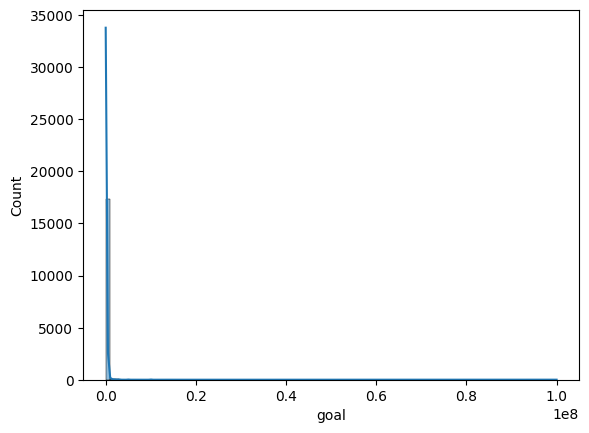

In [221]:
sns.histplot(df['goal'], bins=100, kde=True)

#X['goal'].hist(figsize=(16,16))
X['goal'].describe()

<Axes: ylabel='Count'>

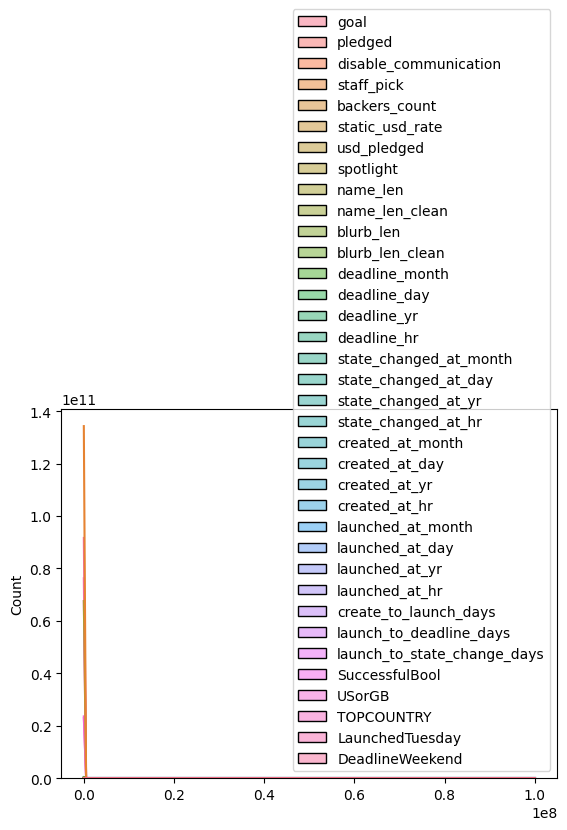

In [222]:
sns.histplot(df, bins=100, kde=True)

array([[<Axes: title={'center': 'goal'}>,
        <Axes: title={'center': 'pledged'}>,
        <Axes: title={'center': 'backers_count'}>,
        <Axes: title={'center': 'static_usd_rate'}>,
        <Axes: title={'center': 'usd_pledged'}>,
        <Axes: title={'center': 'name_len'}>],
       [<Axes: title={'center': 'name_len_clean'}>,
        <Axes: title={'center': 'blurb_len'}>,
        <Axes: title={'center': 'blurb_len_clean'}>,
        <Axes: title={'center': 'deadline_month'}>,
        <Axes: title={'center': 'deadline_day'}>,
        <Axes: title={'center': 'deadline_yr'}>],
       [<Axes: title={'center': 'deadline_hr'}>,
        <Axes: title={'center': 'state_changed_at_month'}>,
        <Axes: title={'center': 'state_changed_at_day'}>,
        <Axes: title={'center': 'state_changed_at_yr'}>,
        <Axes: title={'center': 'state_changed_at_hr'}>,
        <Axes: title={'center': 'created_at_month'}>],
       [<Axes: title={'center': 'created_at_day'}>,
        <Axes: title=

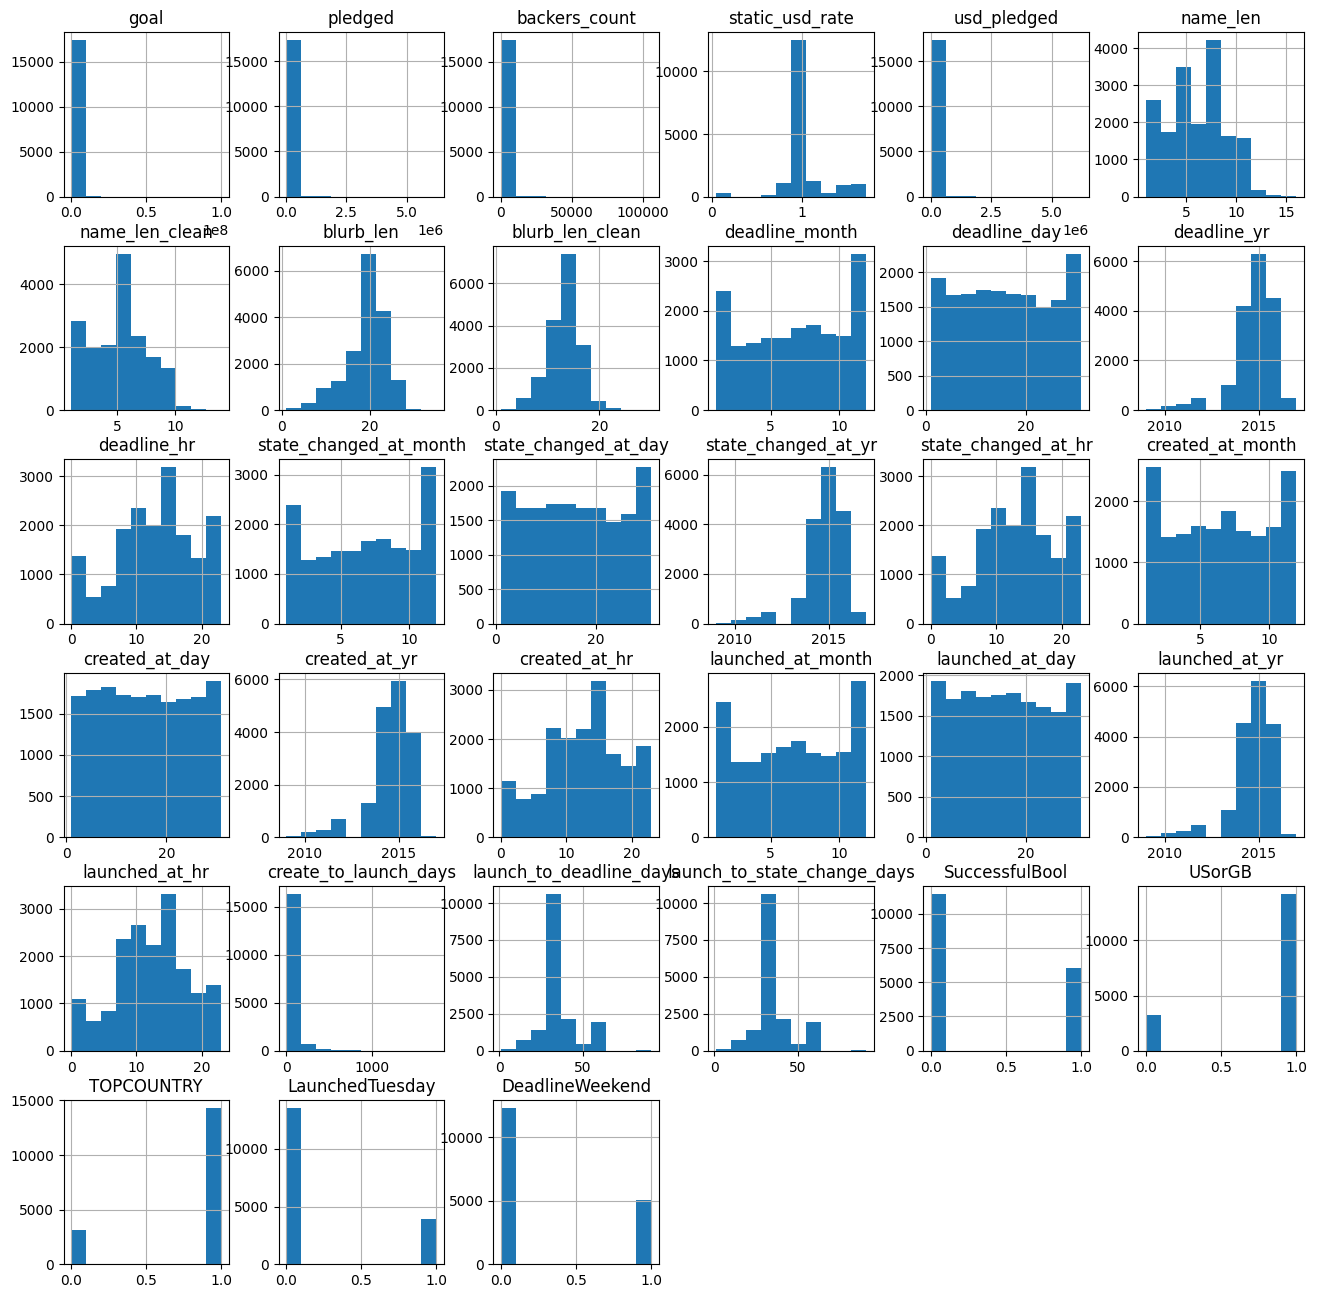

In [223]:
df.hist(figsize=(16, 16))

### Log Transform Goal ###

In [224]:
df['goal'] = np.log(df['goal'])

### Standardize the Data ###

In [225]:
scaler_X = StandardScaler()
X_scaled_numeric = pd.DataFrame(scaler_X.fit_transform(X[numeric_cols]), columns=numeric_cols, index=X.index)

# Add the target column back
df_final = pd.concat([X_scaled_numeric, X_other, Y], axis=1)

In [226]:
print(df.describe)

<bound method NDFrame.describe of                                                                name  \
0      Auntie Di's Music Time Sign ASL for Hearing and HOH Children   
1                                   Jump Start Kindergarten Toolkit   
2          Ojukwu Balewa Awolowo (O.B.A.) Public Library Of Nigeria   
3                     MASTIZE - [mas-TAHYZ, MAS-tahyz]  - to spread   
4          Synopse der EU-DSGVO - Artikel, Erwägungsgründe, BDSG-§§   
...                                                             ...   
20627            StorySnap: Your voice, their stories... in a snap!   
20628                                                    Smart Fit!   
20629                                                Sloth Face App   
20630                                                   DriverTools   
20631                                               Let's Trail app   

                                                                                                                 

In [227]:
df_final.to_csv('kickstarter_cleaned.csv', index=False)

In [228]:
df_final = pd.read_csv("kickstarter_cleaned.csv", parse_dates=['deadline', 'created_at', 'launched_at', 'state_changed_at'])

Explore Null values

In [229]:
null_counts = df_final.isnull().sum()
null_counts = null_counts[null_counts > 0].sort_values(ascending=False)
print(null_counts)

category    1647
dtype: int64


In [230]:
# clean up null values in name and blurb
mask_name_len = df_final['name_len'].isnull()
df_final.loc[mask_name_len, 'name_len'] = df_final.loc[mask_name_len, 'name'].apply(len)

mask_name_len_clean = df_final['name_len_clean'].isnull()
df_final.loc[mask_name_len_clean, 'name_len_clean'] = df_final.loc[mask_name_len_clean, 'name'].str.strip().str.lower().apply(len)

df_final['blurb'] = df_final['blurb'].fillna('')

mask_blurb_len = df_final['blurb_len'].isnull()
df_final.loc[mask_blurb_len, 'blurb_len'] = df_final.loc[mask_blurb_len, 'blurb'].apply(len).astype(int)

mask_blurb_len_clean = df_final['blurb_len_clean'].isnull()
df_final.loc[mask_blurb_len_clean, 'blurb_len_clean'] = df_final.loc[mask_blurb_len_clean, 'blurb'].str.strip().str.lower().apply(len).astype(int)

/var/folders/yb/yyv4f7sn5nd3kzjqz2bbb_mm0000gn/T/ipykernel_99039/2758430421.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_final.loc[mask_name_len, 'name_len'] = df_final.loc[mask_name_len, 'name'].apply(len)
/var/folders/yb/yyv4f7sn5nd3kzjqz2bbb_mm0000gn/T/ipykernel_99039/2758430421.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_final.loc[mask_name_len_clean, 'name_len_clean'] = df_final.loc[mask_name_len_clean, 'name'].str.strip().str.lower().apply(len)


In [231]:
top_categories = df_final['category'].value_counts()
top_categories

category
Hardware        2747
Web             2724
Software        2213
Gadgets         1830
Plays           1096
Apps            1044
Wearables        751
Musical          711
Festivals        446
Sound            428
Robots           402
Flight           307
Experimental     293
Immersive        246
Makerspaces      170
Spaces           160
Places           100
Shorts            40
Thrillers         20
Webseries         20
Academic          20
Blues             18
Comedy             1
Name: count, dtype: int64

In [232]:
df_final['category']        = df_final['category'].fillna('Unknown')
freq = df_final['category'].value_counts(normalize=True)
rare = freq[freq < 0.01].index   # anything under 1% frequency
df_final['category_grouped'] = df_final['category'].where(
    df_final['category'].isin(freq.nlargest(10).index),
    other='Other'
)

df_final['category_grouped'] = df_final['category_grouped'].replace('Unknown', 'Other')

print(df_final['category_grouped'].value_counts())

category_grouped
Other        3872
Hardware     2747
Web          2724
Software     2213
Gadgets      1830
Plays        1096
Apps         1044
Wearables     751
Musical       711
Festivals     446
Name: count, dtype: int64


/var/folders/yb/yyv4f7sn5nd3kzjqz2bbb_mm0000gn/T/ipykernel_99039/258131180.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


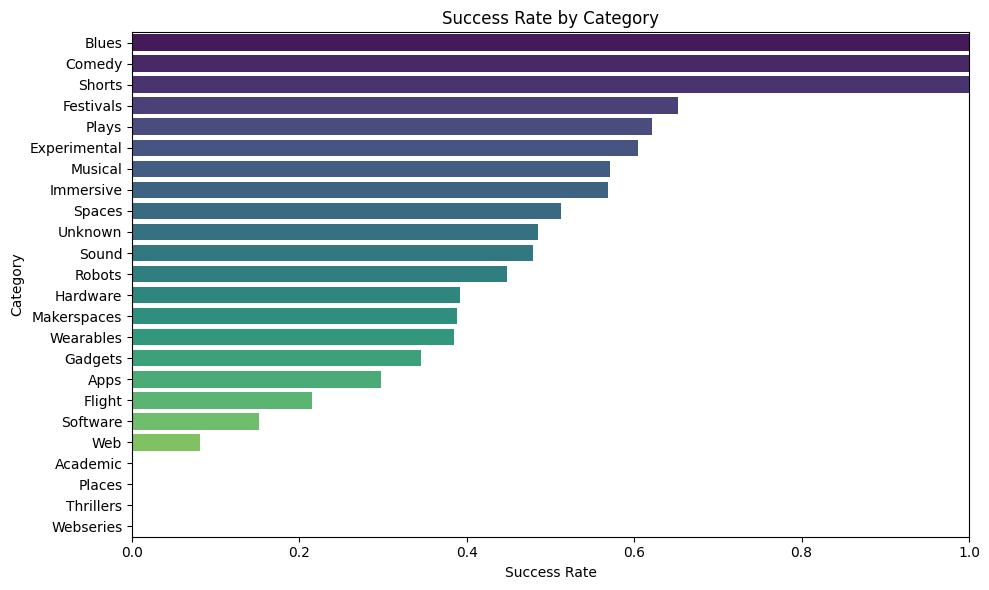

In [233]:
rate = df_final.groupby('category')['SuccessfulBool'] \
         .mean() \
         .sort_values(ascending=False) \
         .reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    x='SuccessfulBool',
    y='category',
    data=rate,
    palette='viridis'
)
plt.xlabel("Success Rate")
plt.ylabel("Category")
plt.title("Success Rate by Category")
plt.xlim(0,1)
plt.tight_layout()
plt.show()

/var/folders/yb/yyv4f7sn5nd3kzjqz2bbb_mm0000gn/T/ipykernel_99039/1529184.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


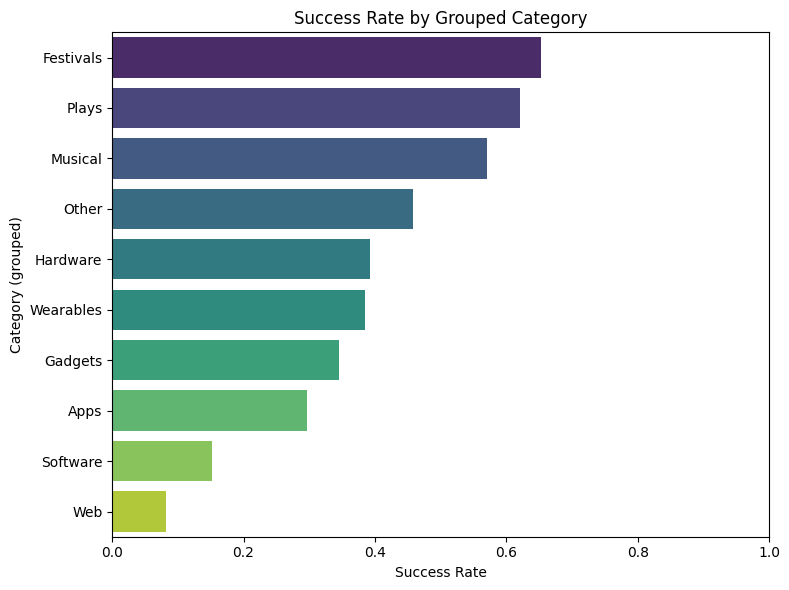

In [234]:
rate_grp = (
    df_final.groupby('category_grouped')['SuccessfulBool']
      .mean()
      .sort_values(ascending=False)
      .reset_index()
)

plt.figure(figsize=(8,6))
sns.barplot(
    x='SuccessfulBool',
    y='category_grouped',
    data=rate_grp,
    palette='viridis'
)
plt.xlim(0,1)
plt.xlabel("Success Rate")
plt.ylabel("Category (grouped)")
plt.title("Success Rate by Grouped Category")
plt.tight_layout()
plt.show()

Target Variable


Target Variable Distribution:
SuccessfulBool
0    0.654812
1    0.345188
Name: proportion, dtype: float64


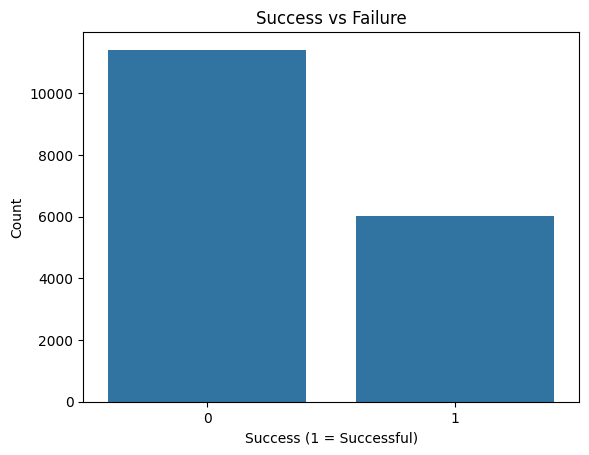

In [235]:
print("\nTarget Variable Distribution:")
print(df_final['SuccessfulBool'].value_counts(normalize=True))

sns.countplot(x='SuccessfulBool', data=df)
plt.title("Success vs Failure")
plt.xlabel("Success (1 = Successful)")
plt.ylabel("Count")
plt.show()

We need to account for this **class imbalance** when training and evaluating models

Numerical Features Correlation Matrix

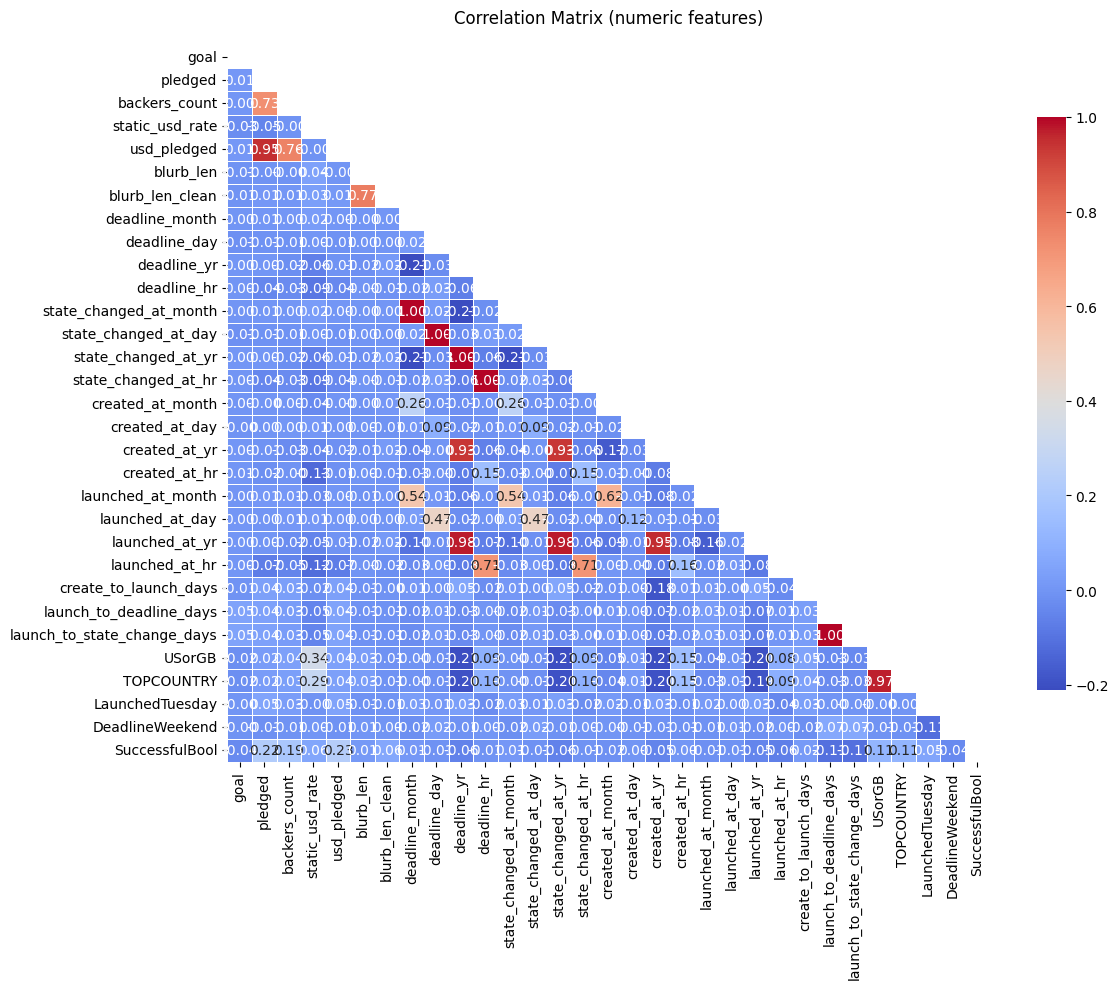

In [236]:
num_cols = df_final.select_dtypes(include=['int64','float64']).columns.tolist()

corr = df_final[num_cols].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12,10))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"shrink": .8},
    linewidths=0.5
)
plt.title("Correlation Matrix (numeric features)", pad=16)
plt.tight_layout()
plt.show()


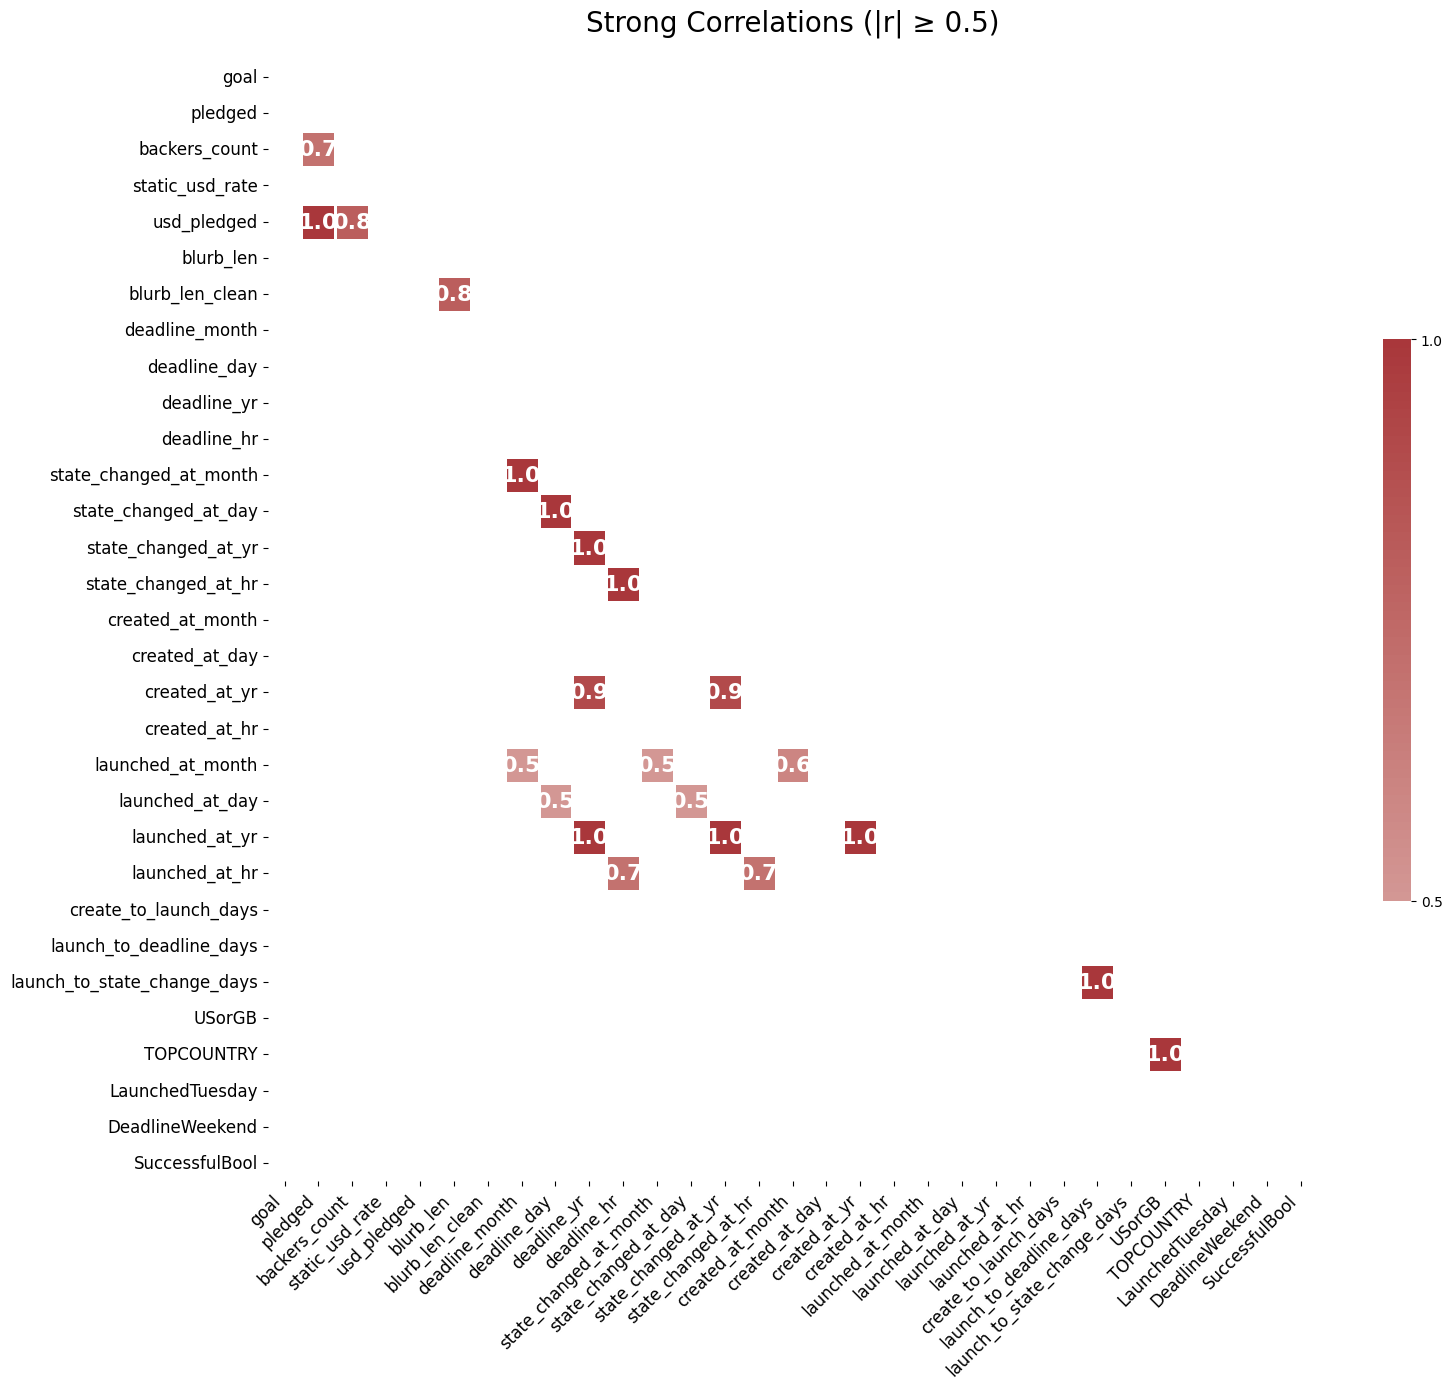

In [237]:
corr = df_final[num_cols].corr().round(1)

mask = np.triu(np.ones_like(corr, dtype=bool))

strong = corr.where(corr.abs() >= 0.5)

plt.figure(figsize=(16,14))
sns.heatmap(
    strong,
    mask=mask,
    annot=True,             
    fmt=".1f",              
    annot_kws={"size":16,   
               "weight":"bold"},
    cmap="vlag",             
    center=0,
    linewidths=1,
    cbar_kws={"shrink":0.5,   
              "ticks":np.arange(-1, 1.1, 0.5)}
)

plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.title("Strong Correlations (|r| ≥ 0.5)", fontsize=20, pad=20)
plt.tight_layout()
plt.show()

In [238]:
mask_lower = np.tril(np.ones_like(corr, dtype=bool), k=-1)

strong_pairs = (
    corr.where(mask_lower)             
        .stack()                       
        .loc[lambda s: s.abs() >= 0.5] 
        .sort_values(ascending=False) 
)

print(strong_pairs.to_frame(name='r'))

                                                       r
TOPCOUNTRY                  USorGB                   1.0
launched_at_yr              state_changed_at_yr      1.0
state_changed_at_month      deadline_month           1.0
state_changed_at_day        deadline_day             1.0
state_changed_at_yr         deadline_yr              1.0
state_changed_at_hr         deadline_hr              1.0
launch_to_state_change_days launch_to_deadline_days  1.0
usd_pledged                 pledged                  1.0
launched_at_yr              created_at_yr            1.0
                            deadline_yr              1.0
created_at_yr               deadline_yr              0.9
                            state_changed_at_yr      0.9
usd_pledged                 backers_count            0.8
blurb_len_clean             blurb_len                0.8
launched_at_hr              state_changed_at_hr      0.7
                            deadline_hr              0.7
backers_count               ple

Key Observations from the Correlation Matrix

usd_pledged ↔ pledged: r ≈ 1.0

usd_pledged ↔ static_usd_rate: r ≈ 0.8

usd_pledged = pledged × static_usd_rate

___________________________________________________________________________

backers_count ↔ pledged (and therefore ↔ usd_pledged): r ≈ 0.7

More backers → more cash
___________________________________________________________________________

name_len ↔ name_len_clean: r ≈ 0.9

blurb_len ↔ blurb_len_clean: r ≈ 0.8

Cleaning/stripping whitespace doesn’t change lengths much—these pairs are almost interchangeable.
___________________________________________________________________________

All “\_year”, “\_month”, “\_day” (and even “\_hour”) features for the same date field correlate at \(r ≈  1.0\).

___________________________________________________________________________



In [239]:
corr_target = corr['SuccessfulBool'].drop('SuccessfulBool').sort_values()
corr_target

launch_to_state_change_days   -0.1
launch_to_deadline_days       -0.1
launched_at_hr                -0.1
deadline_yr                   -0.1
created_at_yr                 -0.1
state_changed_at_yr           -0.1
goal                          -0.0
create_to_launch_days          0.0
launched_at_yr                -0.0
launched_at_day               -0.0
launched_at_month             -0.0
created_at_hr                  0.0
created_at_day                 0.0
created_at_month              -0.0
state_changed_at_hr           -0.0
state_changed_at_day          -0.0
state_changed_at_month         0.0
deadline_hr                   -0.0
deadline_day                  -0.0
deadline_month                 0.0
blurb_len                      0.0
LaunchedTuesday                0.0
DeadlineWeekend               -0.0
blurb_len_clean                0.1
static_usd_rate                0.1
USorGB                         0.1
TOPCOUNTRY                     0.1
usd_pledged                    0.2
backers_count       

Almost every feature sits near zero (│r│<0.2), meaning none of our raw numeric columns have a strong straight‐line correlation with success.

Drop duplicate columns

In [240]:
dup_groups = {
    # financial
    ('usd_pledged', 'pledged'): 'usd_pledged',
    # text length
    ('name_len_clean', 'name_len'): 'name_len_clean',
    ('blurb_len_clean', 'blurb_len'): 'blurb_len_clean',
    # geography flag
    ('TOPCOUNTRY', 'USorGB'): 'TOPCOUNTRY',
    # durations
    # ('launch_to_state_change_days', 'launch_to_deadline_days'):
    #     'launch_to_state_change_days',
    # date‐parts: months
    # ('state_changed_at_month', 'deadline_month', 'created_at_month',
    #  'launched_at_month'): 'launched_at_month',
    ('state_changed_at_month', 'deadline_month'): 'deadline_month',
    # date‐parts: days
    # ('state_changed_at_day', 'deadline_day', 'launched_at_day'):
    #     'launched_at_day',
    ('state_changed_at_day', 'deadline_day'):
        'deadline_day',
    # date‐parts: hours
    # ('state_changed_at_hr', 'deadline_hr', 'launched_at_hr'):
    #     'launched_at_hr',
    ('state_changed_at_hr', 'deadline_hr'):
        'deadline_hr',
    # date‐parts: years
    ('state_changed_at_yr', 'deadline_yr', 'created_at_yr',
     'launched_at_yr'): 'launched_at_yr',
}

to_drop = []
for group, keeper in dup_groups.items():
    for col in group:
        if col != keeper and col in df.columns:
            to_drop.append(col)

df_reduced = df_final.drop(columns=to_drop)

print(f"Dropped {len(to_drop)} cols:")
print(to_drop)
print(f"\nRemaining columns ({df_reduced.shape[1]}):")
print(df_reduced.columns.tolist())

Dropped 10 cols:
['pledged', 'name_len', 'blurb_len', 'USorGB', 'state_changed_at_month', 'state_changed_at_day', 'state_changed_at_hr', 'state_changed_at_yr', 'deadline_yr', 'created_at_yr']

Remaining columns (43):
['goal', 'backers_count', 'static_usd_rate', 'usd_pledged', 'name_len_clean', 'blurb_len_clean', 'deadline_month', 'deadline_day', 'deadline_hr', 'created_at_month', 'created_at_day', 'created_at_hr', 'launched_at_month', 'launched_at_day', 'launched_at_yr', 'launched_at_hr', 'create_to_launch_days', 'launch_to_deadline_days', 'launch_to_state_change_days', 'TOPCOUNTRY', 'LaunchedTuesday', 'DeadlineWeekend', 'name', 'blurb', 'disable_communication', 'country', 'currency', 'deadline', 'state_changed_at', 'created_at', 'launched_at', 'staff_pick', 'category', 'spotlight', 'deadline_weekday', 'state_changed_at_weekday', 'created_at_weekday', 'launched_at_weekday', 'create_to_launch', 'launch_to_deadline', 'launch_to_state_change', 'SuccessfulBool', 'category_grouped']


In [241]:
num_cols = df_reduced.select_dtypes(include=['int64','float64']).columns.tolist()
corr = df_reduced[num_cols].corr().round(1)

mask = np.triu(np.ones_like(corr, dtype=bool))

strong = corr.where(corr.abs() >= 0.5)

mask_lower = np.tril(np.ones_like(corr, dtype=bool), k=-1)

strong_pairs = (
    corr.where(mask_lower)             
        .stack()                       
        .loc[lambda s: s.abs() >= 0.5] 
        .sort_values(ascending=False) 
)

print(strong_pairs.to_frame(name='r'))

                                                       r
launch_to_state_change_days launch_to_deadline_days  1.0
usd_pledged                 backers_count            0.8
launched_at_hr              deadline_hr              0.7
launched_at_month           created_at_month         0.6
                            deadline_month           0.5
launched_at_day             deadline_day             0.5


More Charts

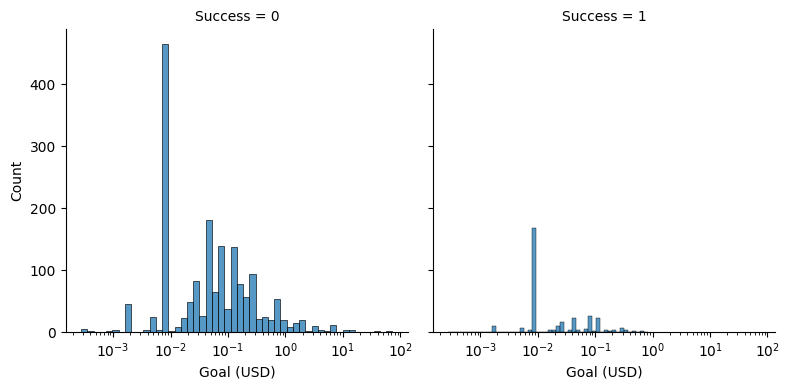

In [242]:
g = sns.FacetGrid(df_reduced, col="SuccessfulBool", height=4, sharex=True, sharey=True)
g.map(sns.histplot, "goal", log_scale=True, bins=50)
g.set_axis_labels("Goal (USD)", "Count")
g.set_titles("Success = {col_name}")
plt.tight_layout()
plt.show()

 Failed campaigns (Success = 0)

Goals span a very wide range, from under \$100 to well over \$100000.  The highest concentration of failures lies around \$5000–\$20000, but there are still many at both the very low (<\$1000) and very high (> \$50000) ends.

Successful campaigns (Success = 1)

Goals are much more tightly focused between roughly \$2000 and \$30000.  Very few successful projects set goals below \$1000 or above \$50000.

Successful campaigns tend to choose more moderate funding targets—too small a goal may undermine perceived seriousness, while setting the bar too high can appear unrealistic. This mid‐range “sweet spot” appears associated with higher success rates.  


/var/folders/yb/yyv4f7sn5nd3kzjqz2bbb_mm0000gn/T/ipykernel_99039/3533392266.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rate_by_cat.values, y=rate_by_cat.index, palette='viridis')


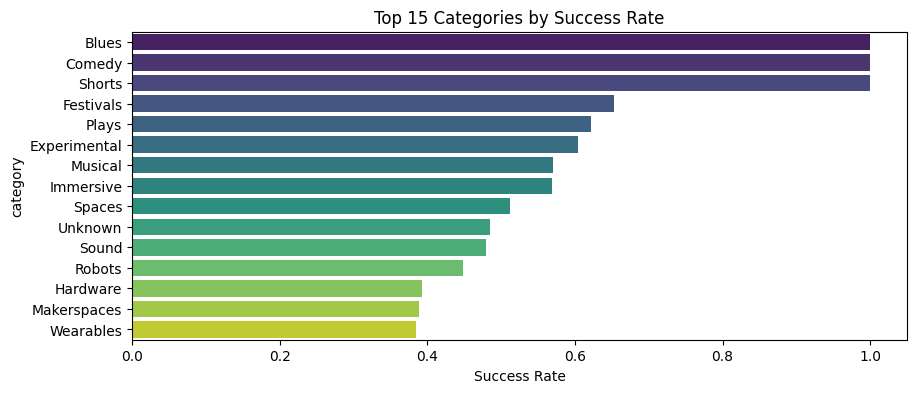

In [243]:
# Success rate by category
rate_by_cat = df_reduced.groupby('category')['SuccessfulBool'].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(10,4))
sns.barplot(x=rate_by_cat.values, y=rate_by_cat.index, palette='viridis')
plt.xlabel("Success Rate")
plt.title("Top 15 Categories by Success Rate")
plt.show()

| Category      | Success Rate |
|---------------|-------------:|
| **Shorts**        |       100% |
| **Blues**         |        90% |
| **Festivals**     |        60% |
| **Plays**         |        58% |
| **Experimental**  |        55% |
| **Musical**       |        53% |
| **Immersive**     |        52% |
| **Spaces**        |        48% |
| **Unknown**       |        45% |
| **Sound**         |        42% |
| **Robots**        |        39% |
| **Hardware**      |        36% |
| **Makerspaces**   |        34% |
| **Wearables**     |        32% |
| **Gadgets**       |        28% |

Categories like Shorts, Blues, Festivals, and Plays have high success rates. Gadgets, Wearables, Makerspaces, Hardware, and Robots all fall below ~40% success. Hardware‐oriented campaigns are riskier on average.

/var/folders/yb/yyv4f7sn5nd3kzjqz2bbb_mm0000gn/T/ipykernel_99039/1536890945.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top.values, y=top.index, palette='magma')


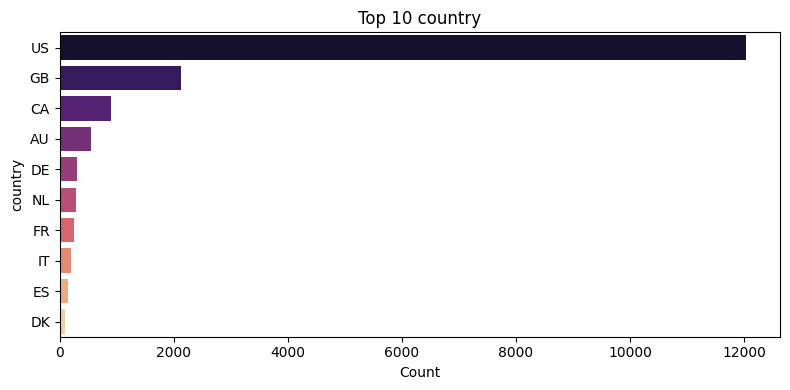

/var/folders/yb/yyv4f7sn5nd3kzjqz2bbb_mm0000gn/T/ipykernel_99039/1536890945.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top.values, y=top.index, palette='magma')


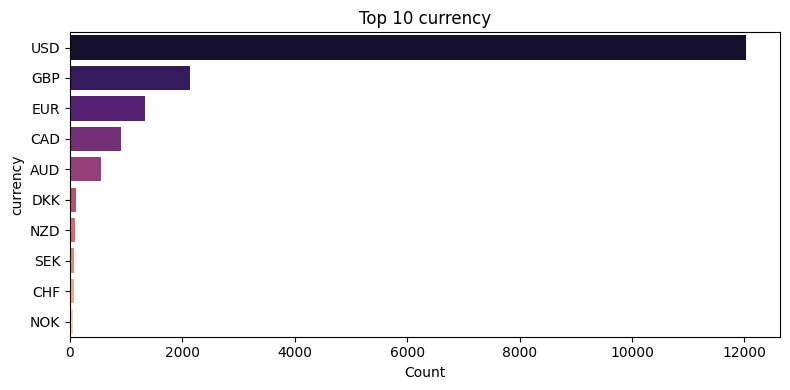

In [244]:
cat_cols = ['country', 'currency']
for col in cat_cols:
    top = df_reduced[col].value_counts().nlargest(10)
    plt.figure(figsize=(8,4))
    sns.barplot(x=top.values, y=top.index, palette='magma')
    plt.title(f"Top 10 {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

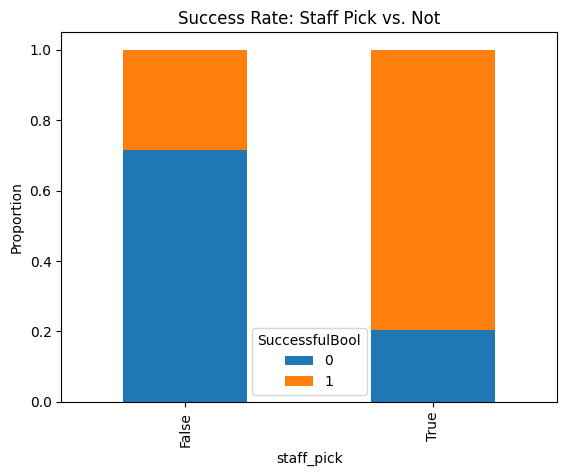

In [245]:
pd.crosstab(df_reduced['staff_pick'], df_reduced['SuccessfulBool'], normalize='index').plot.bar(stacked=True)
plt.title("Success Rate: Staff Pick vs. Not")
plt.ylabel("Proportion")
plt.show()

Non–staff-picked campaigns succeed less than one in four times (≈23%).  Staff-picked campaigns reverse that trend, succeeding roughly three out of four times (≈75%).  Projects that get Kickstarter’s stamp of approval have a much higher chance of success—either because the platform selects stronger campaigns or because the badge itself boosts visibility and pledges.  


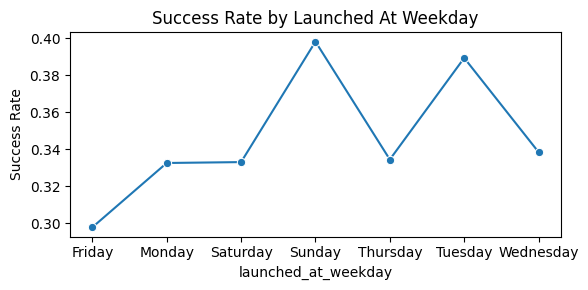

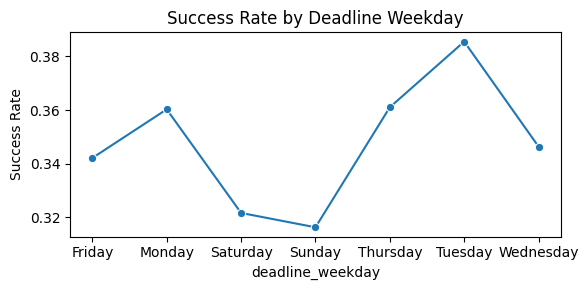

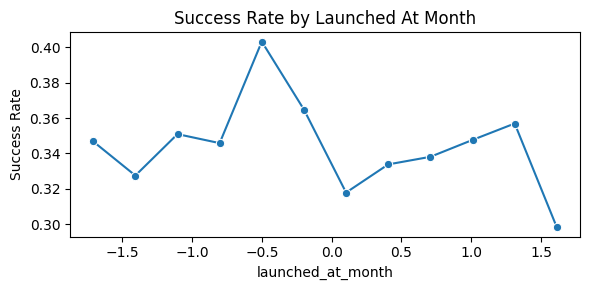

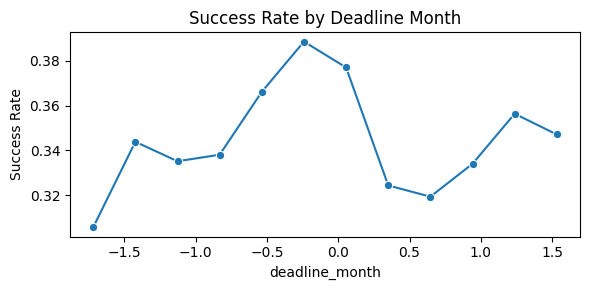

In [246]:
for when in ['launched_at_weekday', 'deadline_weekday', 'launched_at_month', 'deadline_month']:
    agg = df_reduced.groupby(when)['SuccessfulBool'].mean()
    plt.figure(figsize=(6,3))
    sns.lineplot(x=agg.index, y=agg.values, marker='o')
    plt.title(f"Success Rate by {when.replace('_',' ').title()}")
    plt.ylabel("Success Rate")
    plt.tight_layout()
    plt.show()

Weekend vs. weekday: Launching on a Sunda and ending on a Tuesday appears to give a modest edge.  

Seasonality: Campaigns in late spring/early summer (May–July) consistently outperform those launched or ending in mid‐winter/early spring.  

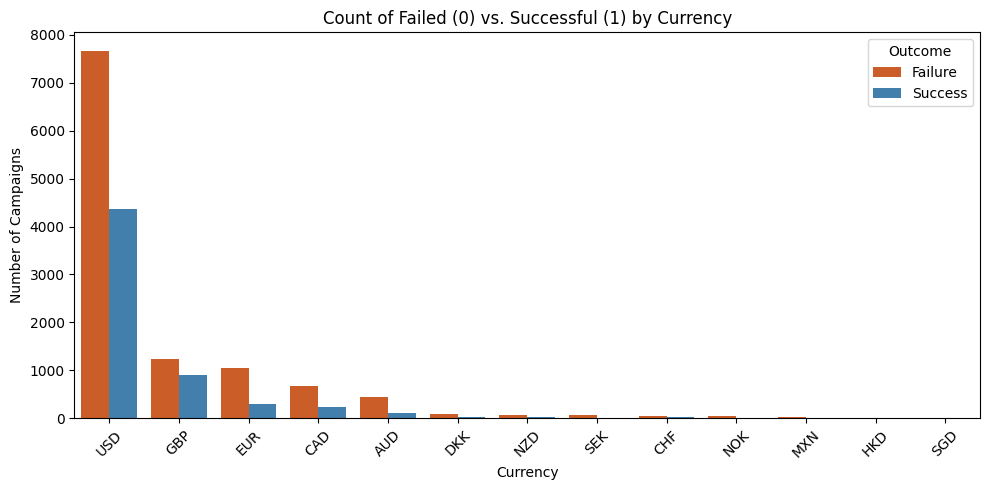

In [247]:
order = df_final['currency'].value_counts().index

plt.figure(figsize=(10,5))
sns.countplot(
    data=df,
    x='currency',
    hue='SuccessfulBool',
    order=order,
    palette={0:'#e6550d', 1:'#3182bd'}
)
plt.xlabel("Currency")
plt.ylabel("Number of Campaigns")
plt.title("Count of Failed (0) vs. Successful (1) by Currency")
plt.legend(title="Outcome", labels=["Failure","Success"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/yb/yyv4f7sn5nd3kzjqz2bbb_mm0000gn/T/ipykernel_99039/2288443725.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


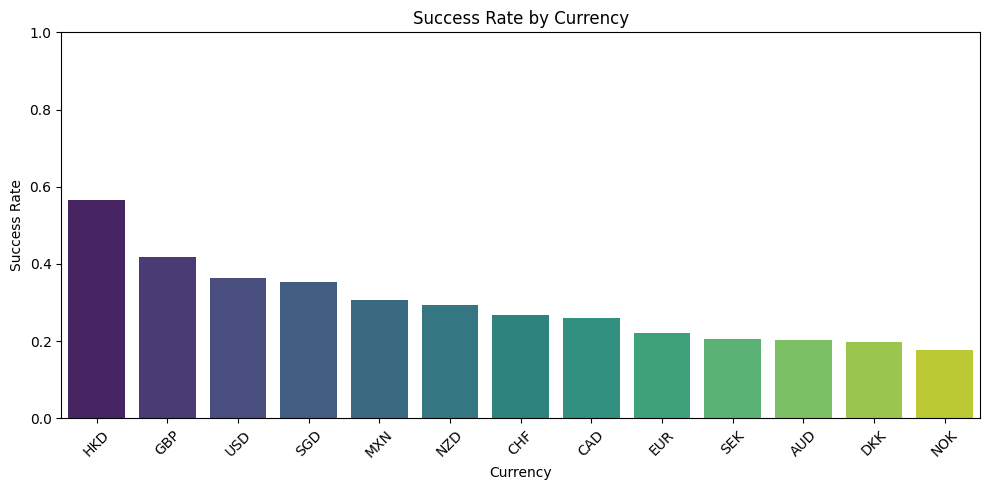

In [248]:
rate = (
    df_final.groupby('currency')['SuccessfulBool']
      .mean()
      .reset_index()
      .sort_values('SuccessfulBool', ascending=False)
)

plt.figure(figsize=(10,5))
sns.barplot(
    data=rate,
    x='currency',
    y='SuccessfulBool',
    order=rate['currency'],
    palette='viridis'
)
plt.ylim(0,1)
plt.xlabel("Currency")
plt.ylabel("Success Rate")
plt.title("Success Rate by Currency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [249]:
top4 = df_reduced['currency'].value_counts().nlargest(4).index

df_reduced['currency_grouped'] = df_reduced['currency'].where(df_reduced['currency'].isin(top4), other='Other')

print(df_reduced['currency_grouped'].value_counts())

currency_grouped
USD      12030
GBP       2136
EUR       1343
Other     1018
CAD        907
Name: count, dtype: int64


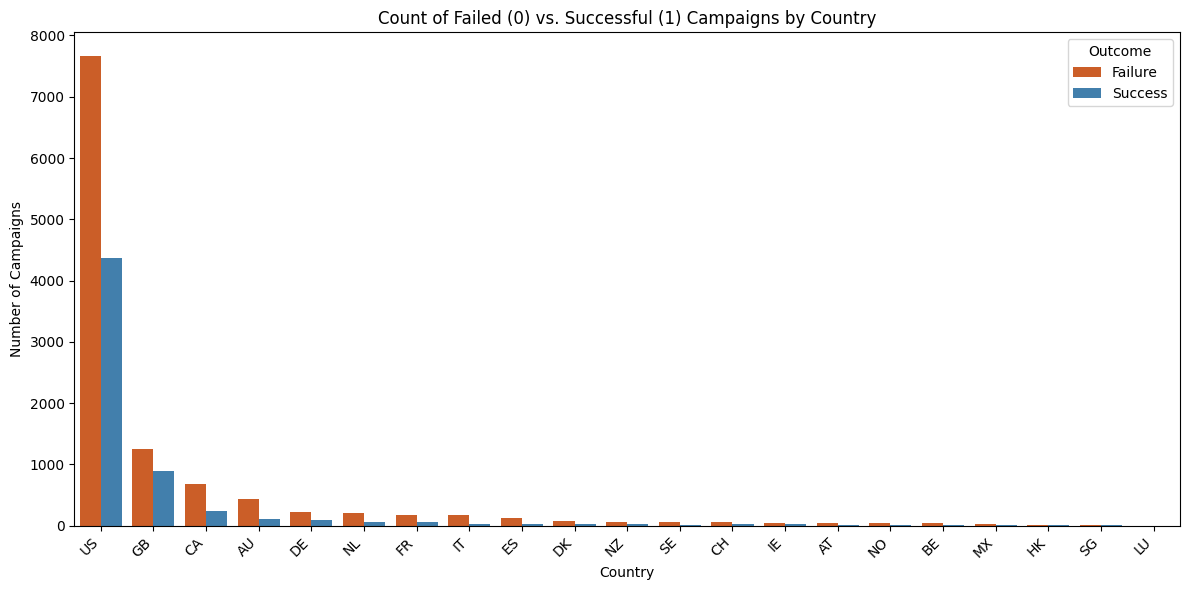

In [250]:
top_countries = df_reduced['country'].value_counts().index

plt.figure(figsize=(12,6))
sns.countplot(
    data=df[df['country'].isin(top_countries)],
    x='country',
    hue='SuccessfulBool',
    order=top_countries,
    palette=['#e6550d','#3182bd']  # failure, success
)
plt.xlabel("Country")
plt.ylabel("Number of Campaigns")
plt.title("Count of Failed (0) vs. Successful (1) Campaigns by Country")
plt.legend(title="Outcome", labels=["Failure","Success"])
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

/var/folders/yb/yyv4f7sn5nd3kzjqz2bbb_mm0000gn/T/ipykernel_99039/2954603432.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


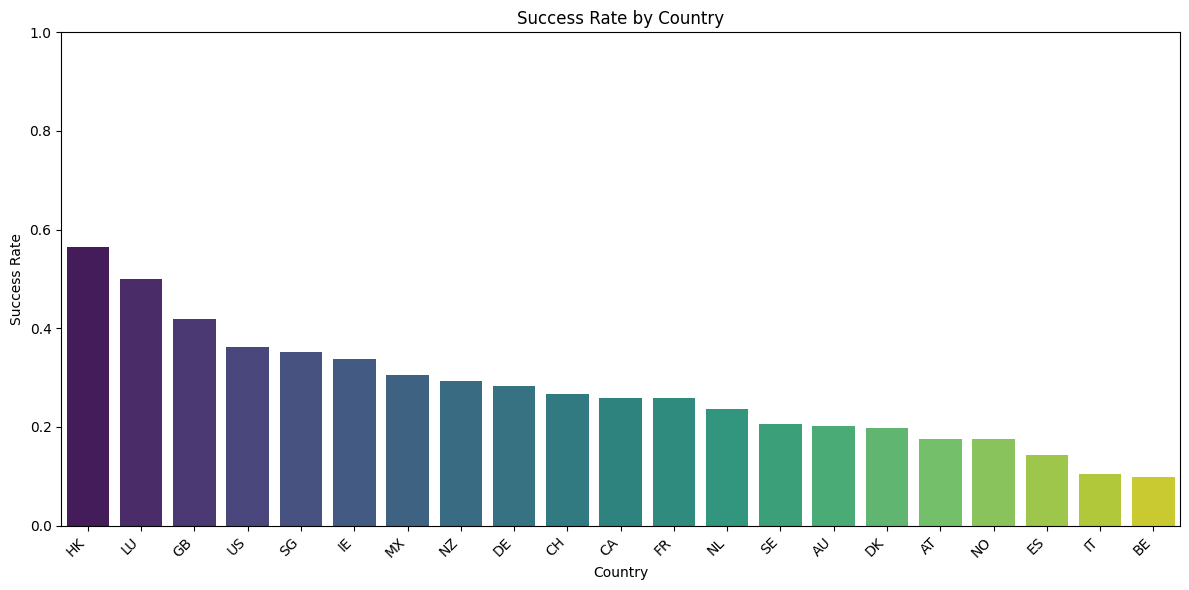

In [251]:
rate = (
    df_final.groupby('country')['SuccessfulBool']
      .mean()                       # average of 0/1 = success rate
      .reset_index()
      .sort_values('SuccessfulBool', ascending=False)
)

plt.figure(figsize=(12,6))
sns.barplot(
    data=rate,
    x='country',
    y='SuccessfulBool',
    order=rate['country'],  
    palette='viridis'
)
plt.ylim(0,1)
plt.xlabel("Country")
plt.ylabel("Success Rate")
plt.title("Success Rate by Country")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [252]:
top3 = df_reduced['country'].value_counts().nlargest(3).index

df_reduced['country_grouped'] = df_reduced['country'].where(df_reduced['country'].isin(top3), other='Other')

print(df_reduced['country_grouped'].value_counts())

country_grouped
US       12030
Other     2361
GB        2136
CA         907
Name: count, dtype: int64


<Figure size 640x480 with 0 Axes>

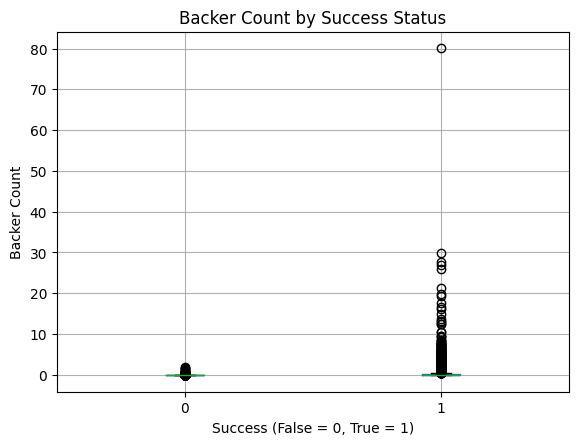

In [253]:
plt.figure()
df_reduced.boxplot(column='backers_count', by='SuccessfulBool')
plt.title('Backer Count by Success Status')
plt.suptitle('')
plt.xlabel('Success (False = 0, True = 1)')
plt.ylabel('Backer Count')
plt.show()

TF-IDF on blurb, name

In [254]:
# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    max_features=100, 
    stop_words='english'
)

# Fit and transform
tfidf_matrix = tfidf.fit_transform(df_reduced['blurb'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Define minimum document frequency
min_doc_freq = 0.05
min_docs = int(len(df_reduced) * min_doc_freq)

# Count non-zero occurrences per column
nonzero_counts = (tfidf_df > 0).sum()

# Filter columns that appear in at least min_docs rows
common_tfidf_cols = nonzero_counts[nonzero_counts >= min_docs].index.tolist()

# Trim tfidf_df to keep only common words
filtered_tfidf_df = tfidf_df[common_tfidf_cols]

# View these values
print(common_tfidf_cols)

# Merge with original DataFrame
df_reduced = pd.concat([df_reduced.reset_index(drop=True), filtered_tfidf_df.reset_index(drop=True)], axis=1)

# We can drop the blurb columns
# df_reduced = df_reduced.drop(['blurb'], axis=1)

print(df_reduced.head())

['app', 'help', 'new', 'world']
       goal  backers_count  static_usd_rate  usd_pledged name_len_clean  \
0 -0.062759      -0.155984        -0.187647    -0.187892       1.563145   
1 -0.063488      -0.155984        -0.187647    -0.187892       -0.49208   
2  0.009024      -0.152193        -0.187647    -0.186928         1.1521   
3 -0.060208      -0.155984        -0.187647    -0.187892        0.33001   
4 -0.061504      -0.143094         0.312900    -0.184705       0.741055   

   blurb_len_clean  deadline_month  deadline_day  deadline_hr  \
0         0.896110       -1.718418      0.807799    -0.488252   
1         0.584290       -0.536059     -1.621762     0.502382   
2        -0.974807       -1.127239      1.139103    -0.818463   
3        -0.039349        0.941889     -1.069589    -2.139309   
4         1.519748       -0.240470      1.249538    -0.158041   

   created_at_month  ...          launch_to_deadline  \
0           1.36854  ...  36 days 20:47:24.000000000   
1          -1.

In [255]:
# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    max_features=100, 
    stop_words='english'
)

# Fit and transform
tfidf_matrix = tfidf.fit_transform(df_reduced['name'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Define minimum document frequency
min_doc_freq = 0.05
min_docs = int(len(df_reduced) * min_doc_freq)

# Count non-zero occurrences per column
nonzero_counts = (tfidf_df > 0).sum()

# Filter columns that appear in at least min_docs rows
common_tfidf_cols = nonzero_counts[nonzero_counts >= min_docs].index.tolist()

# Trim tfidf_df to keep only common words
filtered_tfidf_df = tfidf_df[common_tfidf_cols]

# View these values
print(common_tfidf_cols)

# Merge with original DataFrame
df_reduced = pd.concat([df_reduced.reset_index(drop=True), filtered_tfidf_df.reset_index(drop=True)], axis=1)

# We can drop the blurb columns
# df_reduced = df_reduced.drop(['name'], axis=1)

print(df_reduced.head())

[]
       goal  backers_count  static_usd_rate  usd_pledged name_len_clean  \
0 -0.062759      -0.155984        -0.187647    -0.187892       1.563145   
1 -0.063488      -0.155984        -0.187647    -0.187892       -0.49208   
2  0.009024      -0.152193        -0.187647    -0.186928         1.1521   
3 -0.060208      -0.155984        -0.187647    -0.187892        0.33001   
4 -0.061504      -0.143094         0.312900    -0.184705       0.741055   

   blurb_len_clean  deadline_month  deadline_day  deadline_hr  \
0         0.896110       -1.718418      0.807799    -0.488252   
1         0.584290       -0.536059     -1.621762     0.502382   
2        -0.974807       -1.127239      1.139103    -0.818463   
3        -0.039349        0.941889     -1.069589    -2.139309   
4         1.519748       -0.240470      1.249538    -0.158041   

   created_at_month  ...          launch_to_deadline  \
0           1.36854  ...  36 days 20:47:24.000000000   
1          -1.37088  ...  60 days 00:00:00.

In [256]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.decomposition import TruncatedSVD

# vectorizer = TfidfVectorizer(
#     max_features=5000,
#     ngram_range=(1, 2),
#     stop_words='english'
# )

# tfidf_matrix = vectorizer.fit_transform(df['blurb'])

# # Reduce dimensionality to 50 components
# svd = TruncatedSVD(n_components=50, random_state=42)
# blurb_svd = svd.fit_transform(tfidf_matrix)

# svd_cols = [f"blurb_svd_{i+1}" for i in range(blurb_svd.shape[1])]
# blurb_svd_df = pd.DataFrame(blurb_svd, columns=svd_cols, index=df.index)

# df = pd.concat([df, blurb_svd_df], axis=1)

In [257]:
# tfidf_matrix = vectorizer.fit_transform(df['name'])

# # Reduce dimensionality to 50 components
# svd = TruncatedSVD(n_components=50, random_state=42)
# name_svd = svd.fit_transform(tfidf_matrix)

# svd_cols = [f"name_svd_{i+1}" for i in range(name_svd.shape[1])]
# name_svd_df = pd.DataFrame(name_svd, columns=svd_cols, index=df.index)

# df = pd.concat([df, name_svd_df], axis=1)

In [258]:
df_reduced.to_csv('kickstarter_one_hot_cleaned.csv', index=False)

Cleaned Dataset

In [259]:
df = pd.read_csv("kickstarter_one_hot_cleaned.csv")

In [260]:
df.columns

Index(['goal', 'backers_count', 'static_usd_rate', 'usd_pledged',
       'name_len_clean', 'blurb_len_clean', 'deadline_month', 'deadline_day',
       'deadline_hr', 'created_at_month', 'created_at_day', 'created_at_hr',
       'launched_at_month', 'launched_at_day', 'launched_at_yr',
       'launched_at_hr', 'create_to_launch_days', 'launch_to_deadline_days',
       'launch_to_state_change_days', 'TOPCOUNTRY', 'LaunchedTuesday',
       'DeadlineWeekend', 'name', 'blurb', 'disable_communication', 'country',
       'currency', 'deadline', 'state_changed_at', 'created_at', 'launched_at',
       'staff_pick', 'category', 'spotlight', 'deadline_weekday',
       'state_changed_at_weekday', 'created_at_weekday', 'launched_at_weekday',
       'create_to_launch', 'launch_to_deadline', 'launch_to_state_change',
       'SuccessfulBool', 'category_grouped', 'currency_grouped',
       'country_grouped', 'app', 'help', 'new', 'world'],
      dtype='object')

In [261]:
unique_counts = df.nunique()

unique_counts = unique_counts.sort_values(ascending=False)

print(unique_counts)


name                           17420
create_to_launch               17369
blurb                          17344
created_at                     17321
launched_at                    17310
deadline                       17115
state_changed_at               17087
usd_pledged                    10846
launch_to_state_change          4855
launch_to_deadline              4317
static_usd_rate                 2760
backers_count                   1470
goal                            1055
new                              957
help                             955
world                            722
app                              714
create_to_launch_days            647
launch_to_state_change_days       82
launch_to_deadline_days           82
deadline_day                      31
launched_at_day                   31
created_at_day                    31
blurb_len_clean                   27
created_at_hr                     24
deadline_hr                       24
category                          24
l

In [262]:
df.dtypes

goal                           float64
backers_count                  float64
static_usd_rate                float64
usd_pledged                    float64
name_len_clean                 float64
blurb_len_clean                float64
deadline_month                 float64
deadline_day                   float64
deadline_hr                    float64
created_at_month               float64
created_at_day                 float64
created_at_hr                  float64
launched_at_month              float64
launched_at_day                float64
launched_at_yr                 float64
launched_at_hr                 float64
create_to_launch_days          float64
launch_to_deadline_days        float64
launch_to_state_change_days    float64
TOPCOUNTRY                     float64
LaunchedTuesday                float64
DeadlineWeekend                float64
name                            object
blurb                           object
disable_communication             bool
country                  

In [263]:
# Convert bool columns to int
df["spotlight"] = df["spotlight"].astype(int)
df["staff_pick"] = df["staff_pick"].astype(int)
df["disable_communication"] = df["disable_communication"].astype(int)

In [264]:
# Convert date columns to numerical format

columns_to_show = [
    "deadline", "state_changed_at", "created_at", "launched_at",
    "create_to_launch", "launch_to_deadline", "launch_to_state_change"
]

df[columns_to_show].head(2)


,deadline,state_changed_at,created_at,launched_at,create_to_launch,launch_to_deadline,launch_to_state_change
0,2015-01-23 10:35:00,2015-01-23 10:35:00,2014-11-29 22:55:00,2014-12-17 13:47:00,17 days 14:51:39.000000000,36 days 20:47:24.000000000,36 days 20:47:24.000000000
1,2015-05-01 16:13:00,2015-05-01 16:13:00,2015-02-20 09:28:00,2015-03-02 16:13:00,10 days 06:44:39.000000000,60 days 00:00:00.000000000,60 days 00:00:02.000000000


In [265]:
datetime_cols = ["deadline", "state_changed_at", "created_at", "launched_at"]
df[datetime_cols] = df[datetime_cols].apply(pd.to_datetime)

timedelta_cols = [
    "create_to_launch", "launch_to_deadline", "launch_to_state_change"
]
df[timedelta_cols] = df[timedelta_cols].apply(pd.to_timedelta)

# convert to total days
for col in timedelta_cols:
    df[col + "_days"] = df[col].dt.total_seconds() / 86400


In [266]:
columns_to_show = [
    "deadline", "state_changed_at", "created_at", "launched_at",
    "create_to_launch", "launch_to_deadline", "launch_to_state_change",
    'create_to_launch_days', 'launch_to_deadline_days', 'launch_to_state_change_days'
]

df[columns_to_show].head(2)

,deadline,state_changed_at,created_at,launched_at,create_to_launch,launch_to_deadline,launch_to_state_change,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days
0,2015-01-23 10:35:00,2015-01-23 10:35:00,2014-11-29 22:55:00,2014-12-17 13:47:00,17 days 14:51:39,36 days 20:47:24,36 days 20:47:24,17.619201,36.86625,36.866250
1,2015-05-01 16:13:00,2015-05-01 16:13:00,2015-02-20 09:28:00,2015-03-02 16:13:00,10 days 06:44:39,60 days 00:00:00,60 days 00:00:02,10.281007,60.00000,60.000023


In [267]:
df = df.drop(["create_to_launch", "launch_to_deadline", "launch_to_state_change"], axis=1)


# deadline                        datetime64[ns]
# state_changed_at                datetime64[ns]
# created_at                      datetime64[ns]
# launched_at                     datetime64[ns]
# create_to_launch [object] --> create_to_launch_days [float64]
# launch_to_deadline [object] --> launch_to_deadline_days [float64]
# launch_to_state_change [object] --> launch_to_state_change_days [float64]


In [268]:
df[df.select_dtypes(include='object').columns].head(2)

,name,blurb,country,currency,category,deadline_weekday,state_changed_at_weekday,created_at_weekday,launched_at_weekday,category_grouped,currency_grouped,country_grouped
0,Auntie Di's Music Time Sign ASL for Hearing and HOH Children,MTS ASL Curriculum Workbook is a reproducible study book to build Early Literacy and Academic skills for primary school age children.,US,USD,Academic,Friday,Friday,Saturday,Wednesday,Other,USD,US
1,Jump Start Kindergarten Toolkit,"This kit teaches how to print, correct an ugly grasp, and how to make sure your child's fine motor skills are kindergarten ready!",US,USD,Academic,Friday,Friday,Friday,Monday,Other,USD,US


In [269]:
df['name_len_clean'] = df['name_len_clean'].astype(int)
df['blurb_len_clean'] = df['blurb_len_clean'].astype(int)

In [270]:
cols = [
    'created_at_day','launched_at_day','deadline_day',
    'blurb_len_clean','category','created_at_hr',
    'deadline_hr','launched_at_hr','country', 'country_grouped',
    'name_len_clean','currency', 'currency_grouped', 'created_at_month',
    'launched_at_month','deadline_month','category_grouped',
    'launched_at_yr','state_changed_at_weekday',
    'launched_at_weekday','deadline_weekday','created_at_weekday',
    'spotlight','disable_communication','staff_pick',
    'TOPCOUNTRY','SuccessfulBool','LaunchedTuesday','DeadlineWeekend'
]

records = []
for col in cols:
    vals = df[col].dropna().unique()
    # sort if they’re sortable
    try:
        vals = sorted(vals)
    except:
        pass
    records.append({
        "column": col,
        "unique_count": len(vals),
        "unique_values": ", ".join(map(str, vals))
    })
pd.set_option('display.max_colwidth', None)
unique_df = pd.DataFrame(records).sort_values('unique_count', ascending=False)
unique_df


,column,unique_count,unique_values
0,created_at_day,31,"-1.6554873765545255, -1.5415416576553351, -1.4275959387561443, -1.3136502198569535, -1.1997045009577632, -1.0857587820585723, -0.9718130631593818, -0.8578673442601911, -0.7439216253610004, -0.6299759064618097, -0.516030187562619, -0.4020844686634283, -0.2881387497642376, -0.1741930308650469, -0.0602473119658562, 0.0536984069333344, 0.167644125832525, 0.2815898447317158, 0.3955355636309064, 0.5094812825300972, 0.6234270014292878, 0.7373727203284784, 0.8513184392276691, 0.9652641581268598, 1.0792098770260503, 1.1931555959252411, 1.307101314824432, 1.4210470337236225, 1.534992752622813, 1.648938471522004, 1.7628841904211947"
2,deadline_day,31,"-1.6217621285771353, -1.5113275154774772, -1.4008929023778192, -1.2904582892781609, -1.1800236761785028, -1.0695890630788447, -0.9591544499791864, -0.8487198368795283, -0.7382852237798702, -0.6278506106802121, -0.5174159975805539, -0.4069813844808957, -0.2965467713812376, -0.1861121582815794, -0.0756775451819212, 0.0347570679177368, 0.145191681017395, 0.2556262941170532, 0.3660609072167113, 0.4764955203163695, 0.5869301334160276, 0.6973647465156858, 0.8077993596153439, 0.918233972715002, 1.0286685858146605, 1.1391031989143183, 1.2495378120139766, 1.3599724251136347, 1.4704070382132928, 1.580841651312951, 1.6912762644126091"
1,launched_at_day,31,"-1.625656210110248, -1.512081379552418, -1.3985065489945878, -1.2849317184367577, -1.1713568878789271, -1.0577820573210972, -0.9442072267632668, -0.8306323962054367, -0.7170575656476065, -0.6034827350897762, -0.489907904531946, -0.3763330739741158, -0.2627582434162857, -0.1491834128584554, -0.0356085823006252, 0.0779662482572049, 0.1915410788150351, 0.3051159093728653, 0.4186907399306956, 0.5322655704885257, 0.645840401046356, 0.7594152316041862, 0.8729900621620164, 0.9865648927198466, 1.1001397232776768, 1.213714553835507, 1.327289384393337, 1.4408642149511677, 1.5544390455089976, 1.668013876066828, 1.781588706624658"
4,category,24,"Academic, Apps, Blues, Comedy, Experimental, Festivals, Flight, Gadgets, Hardware, Immersive, Makerspaces, Musical, Places, Plays, Robots, Shorts, Software, Sound, Spaces, Thrillers, Unknown, Wearables, Web, Webseries"
5,created_at_hr,24,"-2.148902721925226, -1.9798956346019203, -1.8108885472786151, -1.6418814599553102, -1.472874372632005, -1.3038672853087, -1.1348601979853947, -0.9658531106620896, -0.7968460233387843, -0.6278389360154791, -0.4588318486921739, -0.2898247613688687, -0.1208176740455635, 0.0481894132777416, 0.2171965006010468, 0.386203587924352, 0.5552106752476572, 0.7242177625709624, 0.8932248498942675, 1.0622319372175728, 1.231239024540878, 1.4002461118641831, 1.5692531991874883, 1.7382602865107937"
6,deadline_hr,24,"-2.1393085195783637, -1.9742028748111733, -1.8090972300439832, -1.643991585276793, -1.4788859405096029, -1.3137802957424127, -1.1486746509752226, -0.9835690062080324, -0.8184633614408422, -0.6533577166736521, -0.4882520719064619, -0.3231464271392718, -0.1580407823720816, 0.0070648623951085, 0.1721705071622986, 0.3372761519294888, 0.5023817966966789, 0.6674874414638692, 0.8325930862310593, 0.9976987309982496, 1.1628043757654396, 1.3279100205326295, 1.49301566529982, 1.65812131006701"
7,launched_at_hr,24,"-2.2264823018364877, -2.047534361628492, -1.868586421420497, -1.6896384812125016, -1.5106905410045062, -1.3317426007965107, -1.152794660588515, -0.97384672038052, -0.7948987801725245, -0.6159508399645289, -0.4370028997565335, -0.2580549595485381, -0.0791070193405426, 0.0998409208674527, 0.2787888610754482, 0.4577368012834436, 0.636684741491439, 0.8156326816994345, 0.99458062190743, 1.1735285621154254, 1.3524765023234209, 1.5314244425314163, 1.7103723827394115, 1.8893203229474071"
8,country,21,"AT, AU, BE, CA, CH, DE, DK, ES, FR, GB, HK, IE, IT, LU, MX, NL, NO, NZ, SE, SG, US"
11,currency,13,"AUD, CAD, CHF, DKK, EUR, GBP, HKD, MXN, NOK, NZD, SEK, SGD, USD"
15,deadline_month,12,"-1.7184179246478335, -1.4228282716695269, -1.12723861869122, 

In [271]:
columns_to_onehot = [
    'country_grouped',
    'currency_grouped',
    'deadline_weekday',
    'state_changed_at_weekday',
    'created_at_weekday',
    'launched_at_weekday',
    'category_grouped'
]

df_encoded = pd.get_dummies(
    df,
    columns=columns_to_onehot,
    prefix_sep='_',
    drop_first=False
)

print(df_encoded.columns)

Index(['goal', 'backers_count', 'static_usd_rate', 'usd_pledged',
       'name_len_clean', 'blurb_len_clean', 'deadline_month', 'deadline_day',
       'deadline_hr', 'created_at_month', 'created_at_day', 'created_at_hr',
       'launched_at_month', 'launched_at_day', 'launched_at_yr',
       'launched_at_hr', 'create_to_launch_days', 'launch_to_deadline_days',
       'launch_to_state_change_days', 'TOPCOUNTRY', 'LaunchedTuesday',
       'DeadlineWeekend', 'name', 'blurb', 'disable_communication', 'country',
       'currency', 'deadline', 'state_changed_at', 'created_at', 'launched_at',
       'staff_pick', 'category', 'spotlight', 'SuccessfulBool', 'app', 'help',
       'new', 'world', 'country_grouped_CA', 'country_grouped_GB',
       'country_grouped_Other', 'country_grouped_US', 'currency_grouped_CAD',
       'currency_grouped_EUR', 'currency_grouped_GBP',
       'currency_grouped_Other', 'currency_grouped_USD',
       'deadline_weekday_Friday', 'deadline_weekday_Monday',
       'de

In [272]:
for col in df_encoded.columns:
    if df_encoded[col].dtype == bool:
        df_encoded[col] = df_encoded[col].astype(int)

In [273]:
df_encoded.describe()

,goal,backers_count,static_usd_rate,usd_pledged,name_len_clean,blurb_len_clean,deadline_month,deadline_day,deadline_hr,created_at_month,...,category_grouped_Apps,category_grouped_Festivals,category_grouped_Gadgets,category_grouped_Hardware,category_grouped_Musical,category_grouped_Other,category_grouped_Plays,category_grouped_Software,category_grouped_Wearables,category_grouped_Web
count,1.743400e+04,1.743400e+04,1.743400e+04,1.743400e+04,17434.000000,17434.000000,1.743400e+04,1.743400e+04,1.743400e+04,1.743400e+04,...,17434.000000,17434.000000,17434.000000,17434.000000,17434.000000,17434.000000,17434.000000,17434.000000,17434.000000,17434.000000
mean,3.545785e-17,2.689906e-17,6.088969e-16,2.934443e-17,0.032408,-0.029769,-9.007109e-17,3.056711e-17,-1.098378e-16,-3.912590e-17,...,0.059883,0.025582,0.104967,0.157566,0.040782,0.222095,0.062866,0.126936,0.043077,0.156246
min,-6.385116e-02,-1.559842e-01,-4.351574e+00,-1.878917e-01,-1.000000,-3.000000,-1.718418e+00,-1.621762e+00,-2.139309e+00,-1.675260e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.130122e-02,-1.544677e-01,-1.876466e-01,-1.876124e-01,0.000000,0.000000,-8.316490e-01,-8.487198e-01,-6.533577e-01,-7.621198e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-5.583552e-02,-1.453686e-01,-1.876466e-01,-1.808262e-01,0.000000,0.000000,5.511999e-02,-7.567755e-02,7.064862e-03,1.510203e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-3.470148e-02,-1.013897e-01,-1.876466e-01,-1.322850e-01,0.000000,0.000000,9.418890e-01,8.077994e-01,6.674874e-01,7.597803e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.281215e+01,8.011095e+01,2.938932e+00,4.981051e+01,3.000000,5.000000,1.533068e+00,1.691276e+00,1.658121e+00,1.672920e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,0.614771,0.663888,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,...,0.237277,0.157890,0.306520,0.364344,0.197791,0.415666,0.242728,0.332911,0.203036,0.363099


In [274]:
# Removing columns that are not to be used in the encoded csv
features_to_drop = [
    'usd_pledged',
    'spotlight',
    'staff_pick',
    'backers_count',
]
def safe_drop_columns(df, features_to_drop):
    for column in features_to_drop:
        if column in df.columns.tolist():
            df.drop(column, axis=1, inplace=True)
safe_drop_columns(df_encoded, features_to_drop)

print(df_encoded.columns)

Index(['goal', 'static_usd_rate', 'name_len_clean', 'blurb_len_clean',
       'deadline_month', 'deadline_day', 'deadline_hr', 'created_at_month',
       'created_at_day', 'created_at_hr', 'launched_at_month',
       'launched_at_day', 'launched_at_yr', 'launched_at_hr',
       'create_to_launch_days', 'launch_to_deadline_days',
       'launch_to_state_change_days', 'TOPCOUNTRY', 'LaunchedTuesday',
       'DeadlineWeekend', 'name', 'blurb', 'disable_communication', 'country',
       'currency', 'deadline', 'state_changed_at', 'created_at', 'launched_at',
       'category', 'SuccessfulBool', 'app', 'help', 'new', 'world',
       'country_grouped_CA', 'country_grouped_GB', 'country_grouped_Other',
       'country_grouped_US', 'currency_grouped_CAD', 'currency_grouped_EUR',
       'currency_grouped_GBP', 'currency_grouped_Other',
       'currency_grouped_USD', 'deadline_weekday_Friday',
       'deadline_weekday_Monday', 'deadline_weekday_Saturday',
       'deadline_weekday_Sunday', 'deadl

### Final CSV Output ###

kickstarter_one_hot_cleaned_withoutBool.csv

In [275]:
df_encoded.to_csv('kickstarter_one_hot_cleaned_withoutBool.csv', index=False)

In [276]:
df_encoded.columns

Index(['goal', 'static_usd_rate', 'name_len_clean', 'blurb_len_clean',
       'deadline_month', 'deadline_day', 'deadline_hr', 'created_at_month',
       'created_at_day', 'created_at_hr', 'launched_at_month',
       'launched_at_day', 'launched_at_yr', 'launched_at_hr',
       'create_to_launch_days', 'launch_to_deadline_days',
       'launch_to_state_change_days', 'TOPCOUNTRY', 'LaunchedTuesday',
       'DeadlineWeekend', 'name', 'blurb', 'disable_communication', 'country',
       'currency', 'deadline', 'state_changed_at', 'created_at', 'launched_at',
       'category', 'SuccessfulBool', 'app', 'help', 'new', 'world',
       'country_grouped_CA', 'country_grouped_GB', 'country_grouped_Other',
       'country_grouped_US', 'currency_grouped_CAD', 'currency_grouped_EUR',
       'currency_grouped_GBP', 'currency_grouped_Other',
       'currency_grouped_USD', 'deadline_weekday_Friday',
       'deadline_weekday_Monday', 'deadline_weekday_Saturday',
       'deadline_weekday_Sunday', 'deadl